# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Mallo, Giuseppe (346884).
2. Nespolo, Elena (345176);

In [ ]:
StudentID1 = 346884
StudentID2 = 345176

## Starting Code-Cell
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [ ]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings',
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing',
                'Entertainment spending', 'Spending on looks',
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics',
                  'Physics', 'Internet', 'PC', 'Economy Management',
                  'Biology', 'Chemistry', 'Reading', 'Geography',
                  'Foreign languages', 'Medicine', 'Law', 'Cars',
                  'Art exhibitions', 'Religion', 'Countryside, outdoors',
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport',
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping',
                  'Science and technology', 'Theatre', 'Fun with friends',
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic',
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated',
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk',
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino',
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload',
                    'Writing notes', 'Workaholism', 'Thinking ahead',
                    'Final judgement', 'Reliability', 'Keeping promises',
                    'Loss of interest', 'Friends versus money', 'Funniness',
                    'Fake', 'Criminal damage', 'Decision making', 'Elections',
                    'Self-criticism', 'Judgment calls', 'Hypochondria',
                    'Empathy', 'Eating to survive', 'Giving',
                    'Compassion to animals', 'Borrowed stuff',
                    'Loneliness', 'Cheating in school', 'Health',
                    'Changing the past', 'God', 'Dreams', 'Charity',
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting',
                    'New environment', 'Mood swings', 'Appearence and gestures',
                    'Socializing', 'Achievements', 'Responding to a serious letter',
                    'Children', 'Assertiveness', 'Getting angry',
                    'Knowing the right people', 'Public speaking',
                    'Unpopularity', 'Life struggles', 'Happiness in life',
                    'Energy levels', 'Small - big dogs', 'Personality',
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies',
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes',
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type],
                                               int(2 * (len(variables_by_type[type]) / 3)),
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Finance
Music
Movies
*************************************
*** THESE ARE THE SELECTED FEATURES:
Eating to survive
Daily events
Writing notes
Cheating in school
Decision making
Life struggles
Prioritising workload
God
Empathy
Dreams
Changing the past
Workaholism
Public speaking
Reliability
Parents' advice
Appearence and gestures
Lying
Elections
Punctuality
Getting angry
Interests or hobbies
Keeping promises
Achievements
Charity
Knowing the right people
Responding to a serious letter
Loss of interest
Funniness
Loneliness
Giving
New environment
Hypochondria
Self-criticism
Borrowed stuff
Friends versus money
Assertiveness
Getting up
Thinking ahead
Smoking
Alcohol
Healthy eating
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reg

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [ ]:
!pip install ipympl

# %matplotlib widget
import scipy
#import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.2 MB/s eta 0:00:00


## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [ ]:
responses_df_all = pd.read_csv('responses_hw.csv')
columns_df = pd.read_csv('columns_hw.csv')

Mounted at /content/drive


In [ ]:
# Load the dataset and create the dataframe with 2/3 of the rows and the feature selected before

np.random.seed(random_seed)
responses_df = responses_df_all.loc[:, these_features]
casual_index = np.random.choice(len(responses_df), int(2*len(responses_df)/3), replace=False)
Xdf_ = responses_df.iloc[casual_index].reset_index(drop=True)

In [ ]:
Xdf_.describe()

Eating to survive  Daily events  Writing notes  Cheating in school  \
count         673.000000    669.000000     672.000000          670.000000   
mean            2.267459      3.073244       3.081845            3.747761   
std             1.241553      1.112942       1.395382            1.257784   
min             1.000000      1.000000       1.000000            1.000000   
25%             1.000000      2.000000       2.000000            3.000000   
50%             2.000000      3.000000       3.000000            4.000000   
75%             3.000000      4.000000       4.000000            5.000000   
max             5.000000      5.000000       5.000000            5.000000   

       Decision making  Life struggles  Prioritising workload         God  \
count       670.000000      670.000000             670.000000  671.000000   
mean          3.195522        3.055224               2.619403    3.320417   
std           1.217330        1.377242               1.234741    1.470156   
min           1.000000        1.000000               1.000000    1.000000   
25%           2.000000        2.000000               2.000000    2.000000   
50%           3.000000        3.000000               3.000000    3.000000   
75%           4.000000        4.000000               3.000000    5.000000   
max           5.000000        5.000000               5.000000    5.000000   

          Empathy      Dreams  ...    Thriller      Comedy    Romantic  \
count  670.000000  673.000000  ...  673.000000  671.000000  670.000000   
mean     3.868657    3.312036  ...    3.367013    4.493294    3.520896   
std      1.138038    0.686252  ...    1.228595    0.785807    1.194912   
min      1.000000    1.000000  ...    1.000000    1.000000    1.000000   
25%      3.000000    3.000000  ...    2.000000    4.000000    3.000000   
50%      4.000000    3.000000  ...    4.000000    5.000000    4.000000   
75%      5.000000    4.000000  ...    4.000000    5.000000    5.000000   
max      5.000000    5.000000  ...    5.000000    5.000000    5.000000   

           Sci-fi         War  Fantasy/Fairy tales    Animated  Documentary  \
count  672.000000  672.000000           671.000000  670.000000   666.000000   
mean     3.132440    3.153274             3.742176    3.773134     3.653153   
std      1.293808    1.361167             1.205953    1.230842     1.120471   
min      1.000000    1.000000             1.000000    1.000000     1.000000   
25%      2.000000    2.000000             3.000000    3.000000     3.000000   
50%      3.000000    3.000000             4.000000    4.000000     4.000000   
75%      4.000000    4.000000             5.000000    5.000000     5.000000   
max      5.000000    5.000000             5.000000    5.000000     5.000000   

          Western      Action  
count  669.000000  673.000000  
mean     2.131540    3.561664  
std      1.149345    1.236650  
min      1.000000    1.000000  
25%      1.000000    3.000000  
50%      2.000000    4.000000  
75%      3.000000    5.000000  
max      5.000000    5.000000  

[8 rows x 75 columns]

In [ ]:
Xdf_.isna().sum()

Eating to survive      0
Daily events           4
Writing notes          1
Cheating in school     3
Decision making        3
                      ..
Fantasy/Fairy tales    2
Animated               3
Documentary            7
Western                4
Action                 0
Length: 79, dtype: int64

There are NaN value for many of the features, now we try to fill them

In [ ]:
numerical_cols = Xdf_.select_dtypes(exclude=['object', 'category']).columns.tolist()
len(numerical_cols)

75

In [ ]:
# We fill the NaN values for every numerical column as the mean of the other values

for col in numerical_cols:
  if sum(Xdf_[col].isna()) > 0:
    Xdf_.loc[:,col] = Xdf_.loc[:,col].fillna(int(np.mean(Xdf_[~Xdf_[col].isna()][col])))

In [ ]:
categorical_cols = Xdf_.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Lying', 'Punctuality', 'Smoking', 'Alcohol']

In [ ]:
for i in range(len(categorical_cols)):
  el = categorical_cols[i]
  print(f'In the column {el} the given answears are: {Xdf_[el].unique()}')
  print(f'The number of NaN values are: {sum(Xdf_[el].isna())}')
  print('')

In the column Lying the given answears are: ['only to avoid hurting someone' 'sometimes' 'everytime it suits me'
 'never' nan]
The number of NaN values are: 1

In the column Punctuality the given answears are: ['late' 'on time' nan 'early']
The number of NaN values are: 2

In the column Smoking the given answears are: ['tried smoking' 'current smoker' 'former smoker' nan 'never smoked']
The number of NaN values are: 5

In the column Alcohol the given answears are: ['social drinker' 'drink a lot' nan 'never']
The number of NaN values are: 3



In [ ]:
lying_dict = {
    'only to avoid hurting someone' : 2,
    'never' : 1,
    'sometimes' : 3,
    'everytime it suits me': 4
}
punctuality_dict = {
    'early' : 1,
    'late' : 3,
    'on time' : 2
}
smoking_dict = {
    'former smoker' : 3,
    'never smoked' : 1,
    'tried smoking' : 2,
    'current smoker' : 4
}
alcohol_dict = {
    'never' : 1,
    'social drinker' : 2,
    'drink a lot' : 3
}

In [ ]:
# map the different answears to the values to the values we have given them with the dictionaries

for el in categorical_cols:
  if el == categorical_cols[0]:
    Xdf_.loc[:,el] = Xdf_.loc[:,el].map(lying_dict)
  elif el == categorical_cols[1]:
    Xdf_.loc[:,el] = Xdf_.loc[:,el].map(punctuality_dict)
  elif el == categorical_cols[2]:
    Xdf_.loc[:,el] = Xdf_.loc[:,el].map(smoking_dict)
  elif el == categorical_cols[3]:
    Xdf_.loc[:,el] = Xdf_.loc[:,el].map(alcohol_dict)

# Again we fill the nan values with the mean of the other values
for el in categorical_cols:
  if sum(Xdf_[el].isna()) > 0:
    Xdf_.loc[:,el] = Xdf_.loc[:,el].fillna(int(np.mean(Xdf_[~Xdf_[el].isna()][el])))
Xdf_ = Xdf_.infer_objects(copy=False)

<ipython-input-13-4f70036c33ce>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Xdf_.loc[:,el] = Xdf_.loc[:,el].fillna(int(np.mean(Xdf_[~Xdf_[el].isna()][el])))


In [ ]:
Xdf_.describe()

Eating to survive  Daily events  Writing notes  Cheating in school  \
count         673.000000    673.000000     673.000000          673.000000   
mean            2.267459      3.072808       3.081724            3.744428   
std             1.241553      1.109639       1.394347            1.255963   
min             1.000000      1.000000       1.000000            1.000000   
25%             1.000000      2.000000       2.000000            3.000000   
50%             2.000000      3.000000       3.000000            4.000000   
75%             3.000000      4.000000       4.000000            5.000000   
max             5.000000      5.000000       5.000000            5.000000   

       Decision making  Life struggles  Prioritising workload         God  \
count       673.000000      673.000000             673.000000  673.000000   
mean          3.194651        3.054978               2.616642    3.319465   
std           1.214680        1.374170               1.232674    1.468070   
min           1.000000        1.000000               1.000000    1.000000   
25%           2.000000        2.000000               2.000000    2.000000   
50%           3.000000        3.000000               3.000000    3.000000   
75%           4.000000        4.000000               3.000000    5.000000   
max           5.000000        5.000000               5.000000    5.000000   

          Empathy      Dreams  ...    Thriller      Comedy    Romantic  \
count  673.000000  673.000000  ...  673.000000  673.000000  673.000000   
mean     3.864785    3.312036  ...    3.367013    4.491828    3.518574   
std      1.136970    0.686252  ...    1.228595    0.785097    1.192747   
min      1.000000    1.000000  ...    1.000000    1.000000    1.000000   
25%      3.000000    3.000000  ...    2.000000    4.000000    3.000000   
50%      4.000000    3.000000  ...    4.000000    5.000000    4.000000   
75%      5.000000    4.000000  ...    4.000000    5.000000    5.000000   
max      5.000000    5.000000  ...    5.000000    5.000000    5.000000   

           Sci-fi         War  Fantasy/Fairy tales    Animated  Documentary  \
count  673.000000  673.000000           673.000000  673.000000   673.000000   
mean     3.132244    3.153046             3.739970    3.769688     3.646360   
std      1.292855    1.360167             1.204836    1.229173     1.116591   
min      1.000000    1.000000             1.000000    1.000000     1.000000   
25%      2.000000    2.000000             3.000000    3.000000     3.000000   
50%      3.000000    3.000000             4.000000    4.000000     4.000000   
75%      4.000000    4.000000             5.000000    5.000000     5.000000   
max      5.000000    5.000000             5.000000    5.000000     5.000000   

          Western      Action  
count  673.000000  673.000000  
mean     2.130758    3.561664  
std      1.145964    1.236650  
min      1.000000    1.000000  
25%      1.000000    3.000000  
50%      2.000000    4.000000  
75%      3.000000    5.000000  
max      5.000000    5.000000  

[8 rows x 79 columns]

In [ ]:
# Check there is no NaN value

Xdf_.isna().sum().sum()

0

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [ ]:
# Apply the scaling

Xstd_df = pd.DataFrame(StandardScaler().fit_transform(Xdf_), columns=Xdf_.columns)
Xmm_df = pd.DataFrame(MinMaxScaler().fit_transform(Xdf_), columns=Xdf_.columns)

In [ ]:
# Compute the variance for the three dataframe

Xdf_var = Xdf_.var().sort_values(ascending=False)
Xstd_var = Xstd_df.var().sort_values(ascending=False)
Xmm_var = Xmm_df.var().sort_values(ascending=False)

In [ ]:
Xdf_var, Xstd_var, Xmm_var

(Elections            2.525406
 God                  2.155231
 Horror               1.996582
 Writing notes        1.944204
 Metal or Hardrock    1.891159
                        ...   
 Lying                0.571371
 Movies               0.521488
 Dreams               0.470941
 Music                0.461270
 Alcohol              0.326094
 Length: 79, dtype: float64,
 Parents' advice             1.001488
 Dreams                      1.001488
 Dance                       1.001488
 Comedy                      1.001488
 Slow songs or fast songs    1.001488
                               ...   
 Punctuality                 1.001488
 Loneliness                  1.001488
 Smoking                     1.001488
 Entertainment spending      1.001488
 Keeping promises            1.001488
 Length: 79, dtype: float64,
 Elections                   0.157838
 Punctuality                 0.150863
 God                         0.134702
 Horror                      0.124786
 Writing notes               0.

In [ ]:
for col in categorical_cols:
  print(col, Xdf_var.index.get_loc(col), Xmm_var.index.get_loc(col))

Lying 74 67
Punctuality 73 1
Smoking 64 12
Alcohol 78 53


- _Xstd_df_ is obtained from applying the Standart Scaler to _X_df_ and by the formula of standartization, it is natural to obtain for all the features a variance equal to 1.
- _Xstd_df_ has larger variances compared to _Xmm_df_. While for the first one it is always 1, the values of _Xmm_df_ are in the range [0,1], therefore the variance must always be less than 1.
- We notice that _Xmm_df_ and _X_df_ have a similar variance order because applying the MinMax Scaler modifies the distances but not the distance ratios. The only differences observed are for the features that were categorical: in _X_df_ their ranges are [0,3] or [0,4] and, since the variance depends also on the interval of the values, their variances in _X_df_ is lower with respect of the variance of all the numerical features (that have a range of [0,5] in _X_df_).

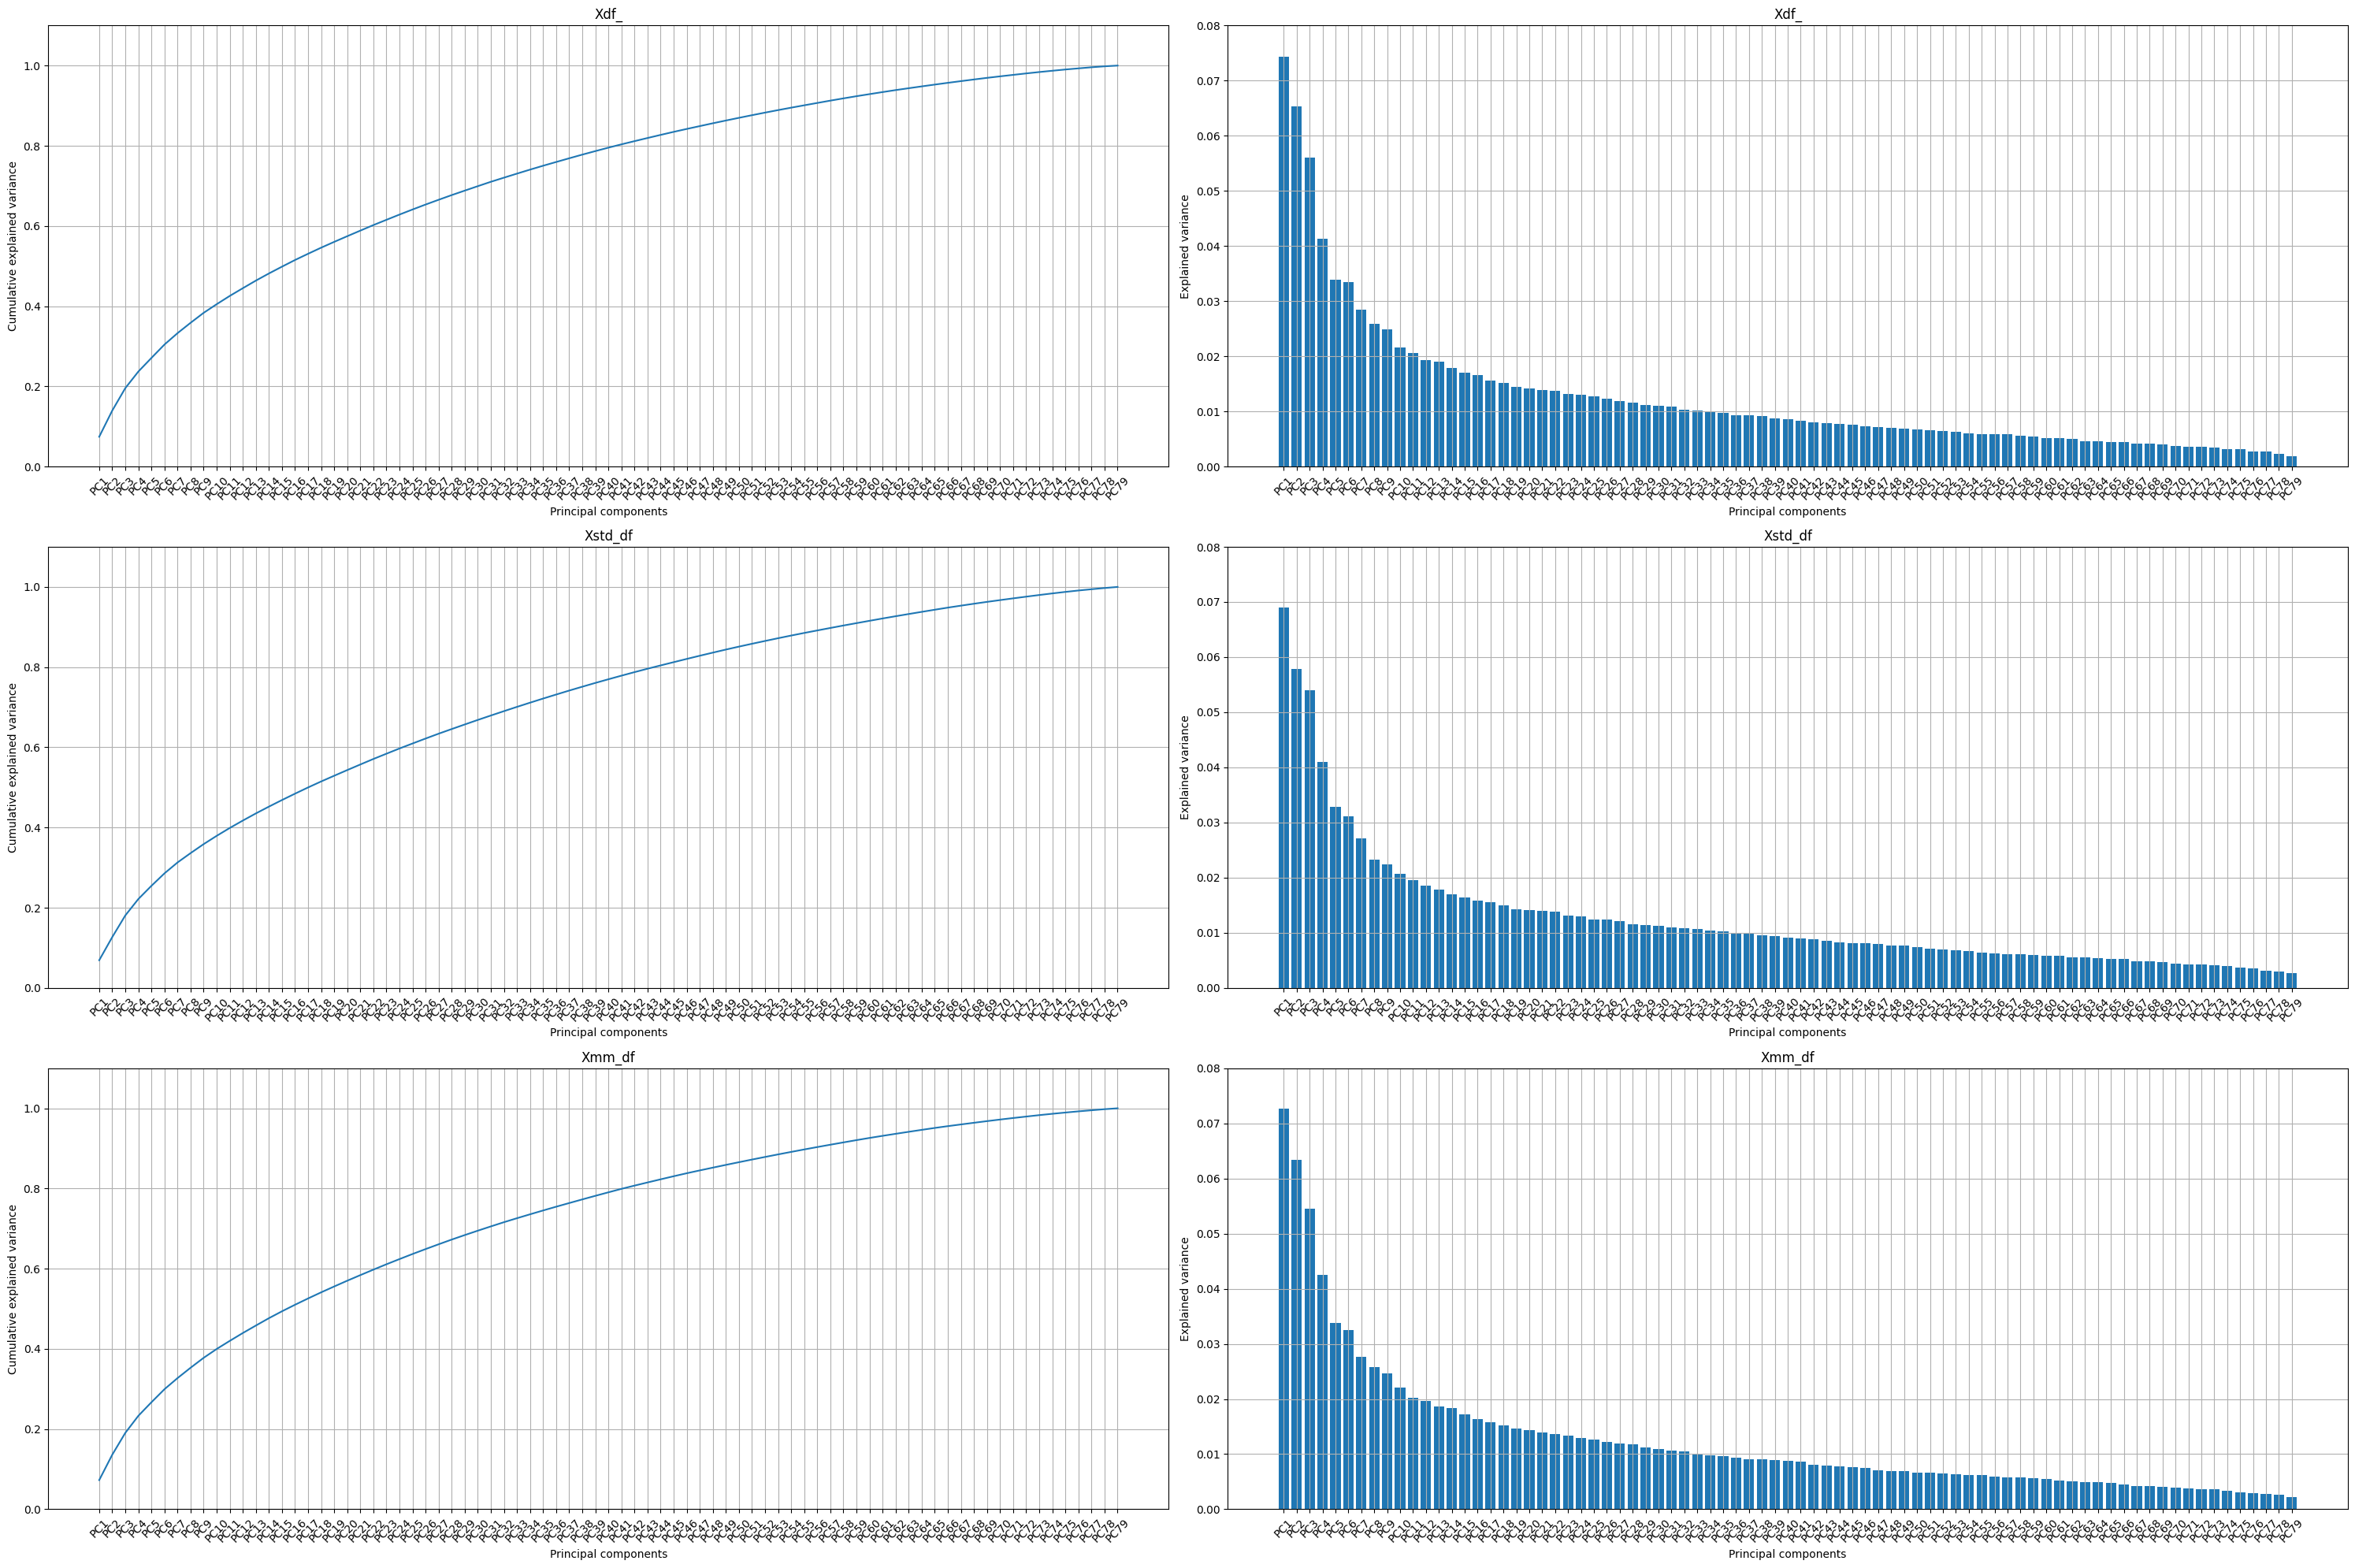

In [ ]:
# Apply the PCA to the three dataframes

pca_full = PCA()
pca_std = PCA()
pca_mm = PCA()

fig, ax = plt.subplots(3,2, figsize=(30,20))

# Xdf_
pca_full.fit(Xdf_)
ax[0,0].plot(np.cumsum(pca_full.explained_variance_ratio_))
ax[0,0].set_title('Xdf_')
ax[0,0].set_ylim([0, 1.1])
ax[0,0].set_xticks(ticks=np.arange(pca_full.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_full.n_features_in_)],
           rotation=45)
ax[0,0].set_xlabel('Principal components')
ax[0,0].set_ylabel('Cumulative explained variance')
ax[0,0].grid()

ax[0,1].bar(x=[f'PC{i + 1}' for i in range(len(pca_full.explained_variance_ratio_))] , height=np.array(pca_full.explained_variance_ratio_))
ax[0,1].set_title('Xdf_')
ax[0,1].set_ylim([0, 0.08])
ax[0,1].set_xticks(ticks=np.arange(pca_full.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_full.n_features_in_)],
           rotation=45)
ax[0,1].set_xlabel('Principal components')
ax[0,1].set_ylabel('Explained variance')
ax[0,1].grid()

# Xstd_df
pca_std.fit(Xstd_df)
ax[1,0].plot(np.cumsum(pca_std.explained_variance_ratio_))
ax[1,0].set_title('Xstd_df')
ax[1,0].set_ylim([0, 1.1])
ax[1,0].set_xticks(ticks=np.arange(pca_std.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_std.n_features_in_)],
           rotation=45)
ax[1,0].set_xlabel('Principal components')
ax[1,0].set_ylabel('Cumulative explained variance')
ax[1,0].grid()

ax[1,1].bar(x=[f'PC{i + 1}' for i in range(len(pca_std.explained_variance_ratio_))] , height=np.array(pca_std.explained_variance_ratio_))
ax[1,1].set_title('Xstd_df')
ax[1,1].set_ylim([0, 0.08])
ax[1,1].set_xticks(ticks=np.arange(pca_std.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_std.n_features_in_)],
           rotation=45)
ax[1,1].set_xlabel('Principal components')
ax[1,1].set_ylabel('Explained variance')
ax[1,1].grid()

# Xmm_df
pca_mm.fit(Xmm_df)
ax[2,0].plot(np.cumsum(pca_mm.explained_variance_ratio_))
ax[2,0].set_title('Xmm_df')
ax[2,0].set_ylim([0, 1.1])
ax[2,0].set_xticks(ticks=np.arange(pca_mm.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_mm.n_features_in_)],
           rotation=45)
ax[2,0].set_xlabel('Principal components')
ax[2,0].set_ylabel('Cumulative explained variance')
ax[2,0].grid()

ax[2,1].bar(x=[f'PC{i + 1}' for i in range(len(pca_mm.explained_variance_ratio_))] , height=np.array(pca_mm.explained_variance_ratio_))
ax[2,1].set_title('Xmm_df')
ax[2,1].set_ylim([0, 0.08])
ax[2,1].set_xticks(ticks=np.arange(pca_mm.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_mm.n_features_in_)],
           rotation=45)
ax[2,1].set_xlabel('Principal components')
ax[2,1].set_ylabel('Explained variance')
ax[2,1].grid()

plt.tight_layout()
plt.show()

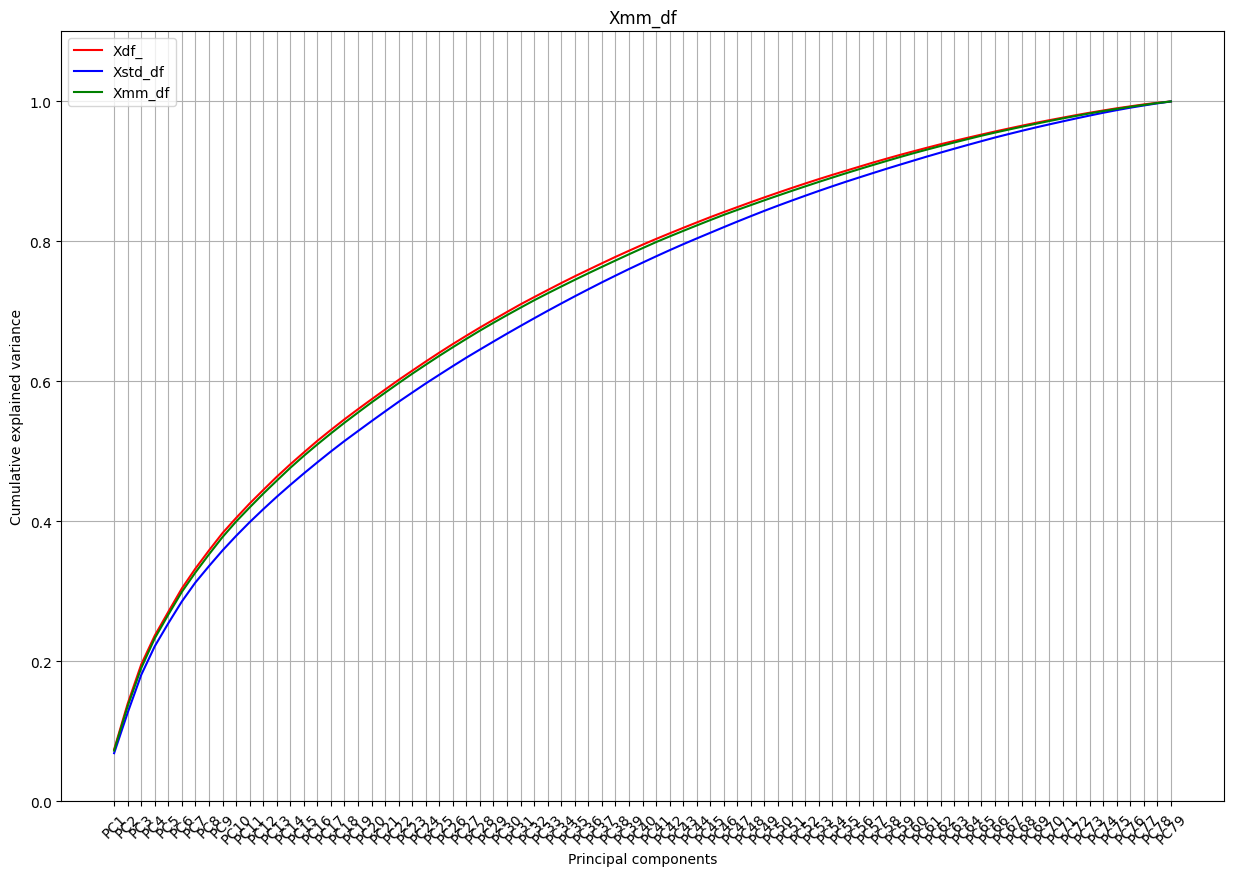

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), color='red', label='Xdf_')
plt.plot(np.cumsum(pca_std.explained_variance_ratio_), color='blue', label='Xstd_df')
plt.plot(np.cumsum(pca_mm.explained_variance_ratio_), color='green', label='Xmm_df')
plt.title('Xmm_df')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_full.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_full.n_features_in_)],
           rotation=45)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.legend()
plt.grid()
plt.show()

- The cumulative variance of _Xmm_df_ and of the original dataframe have no differences because only the range of values changes.
- For the StandardScaler, it changes a bit because the values are not constrained to stay within a specific range. The difference of the cumulative variance is not significant, but it is worse than for the other two dataframe since it is lower.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

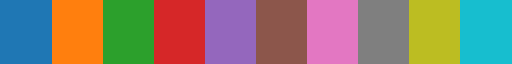

In [ ]:
# Let's create a dataframe df_colors with columns 'short', 'type', 'color'
# where each row correspond to a specific record of our dataset

tab = cm.tab10.colors
display(cm.tab10)

def findType(short):
  for key in variables_by_type.keys():
    if short in variables_by_type[key]:
      return key


type_colors = {
    'Personality' : tab[0],
    'Health' : tab[1],
    'Finance' : tab[2],
    'Music' : tab[3],
    'Movies' : tab[4]
}

df_colors = pd.DataFrame(columns_df.iloc[:, 1])
df_colors = df_colors[df_colors['short'].isin(these_features)].reset_index(drop=True)
df_colors['type'] = pd.Series([findType(df_colors.iloc[i, 0]) for i in range(len(df_colors))])
df_colors['color'] = [type_colors[y] for y in df_colors['type'].values]

these_colors = [df_colors.loc[df_colors['short'] == s]['color'].values[0] for s in these_features]
colors_legend = [Line2D([0], [0], color=type_colors[k]) for k in type_colors.keys()]

In [ ]:
expl_var_std = np.cumsum(pca_std.explained_variance_ratio_)
m_std_33 = np.argmax(expl_var_std>=0.33)+1
m_std = min(m_std_33, 5)

expl_var_mm = np.cumsum(pca_mm.explained_variance_ratio_)
m_mm_33 = np.argmax(expl_var_mm>=0.33)+1
m_mm = min(m_mm_33, 5)

print(f'The 33% of variance is expressed by {m_std_33} PCs for Xstd_df and {m_mm_33} PCs for Xmm_df')
print(f'Hence we choose m = {m_std} for Xstd_df and m = {m_mm} for Xmm_df')


The 33% of variance is expressed by 8 PCs for Xstd_df and 8 PCs for Xmm_df
Hence we choose m = 5 for Xstd_df and m = 5 for Xmm_df


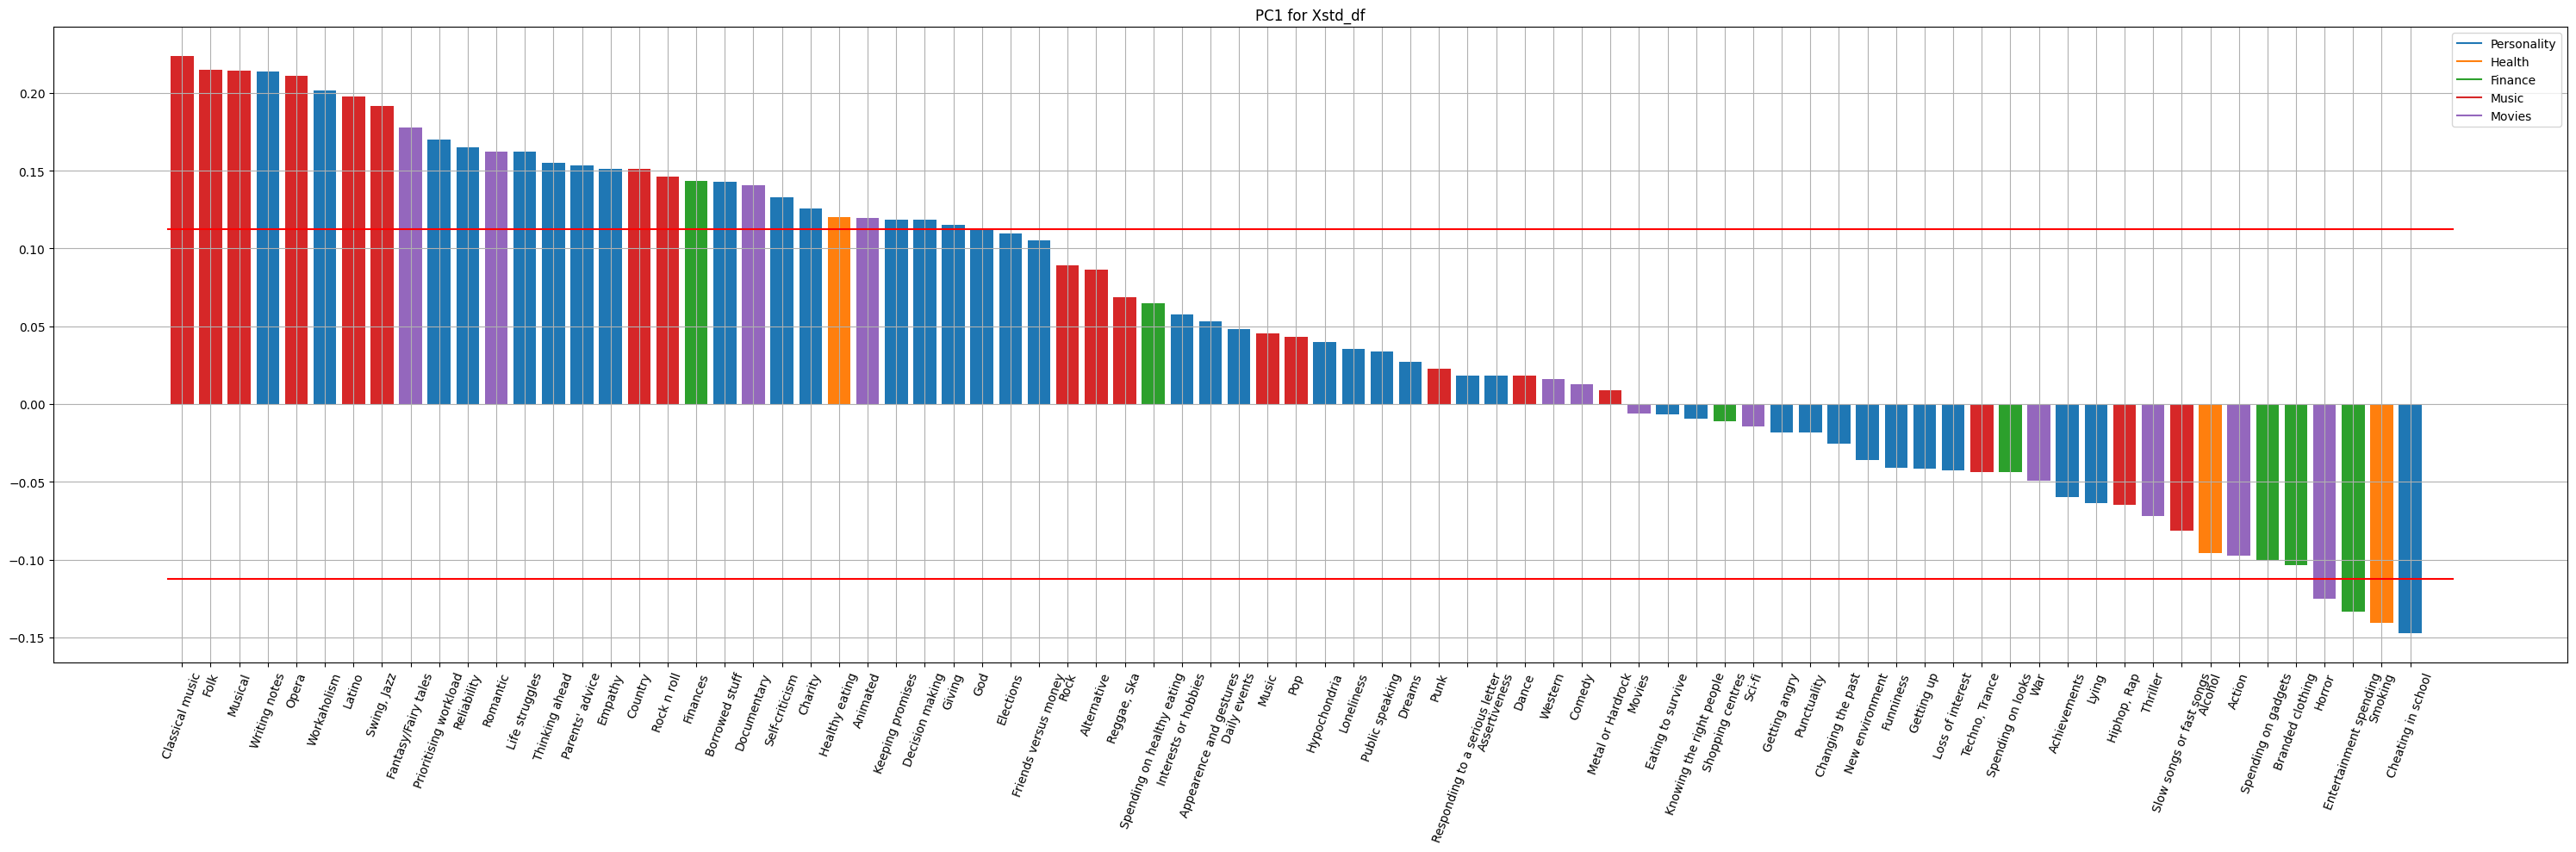

+ components ['Writing notes', 'Decision making', 'Life struggles', 'Prioritising workload', 'Empathy', 'Workaholism', 'Reliability', "Parents' advice", 'Keeping promises', 'Charity', 'Giving', 'Self-criticism', 'Borrowed stuff', 'Thinking ahead', 'Healthy eating', 'Finances', 'Folk', 'Country', 'Classical music', 'Musical', 'Swing, Jazz', 'Rock n roll', 'Latino', 'Opera', 'Romantic', 'Fantasy/Fairy tales', 'Animated', 'Documentary']
- components ['Cheating in school', 'Smoking', 'Entertainment spending', 'Horror']



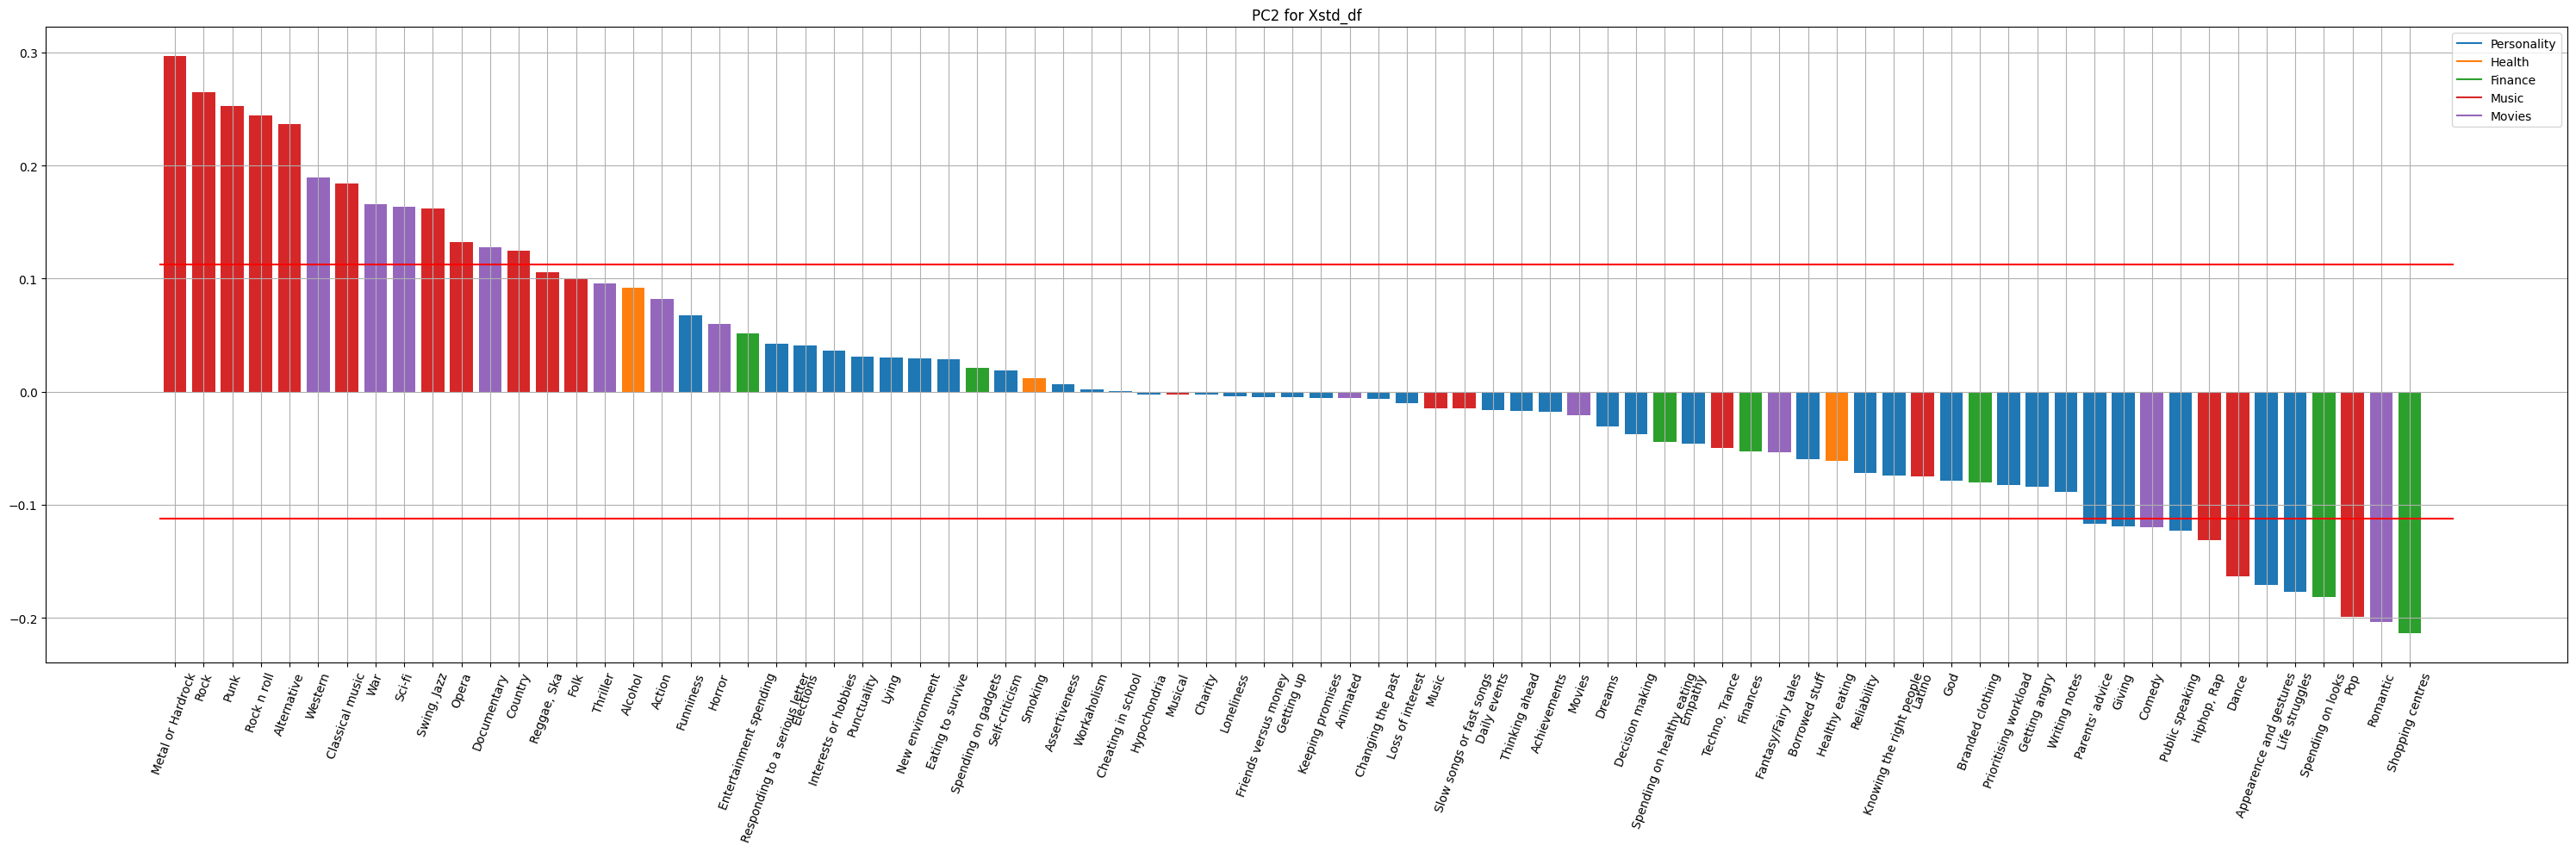

+ components ['Country', 'Classical music', 'Rock', 'Metal or Hardrock', 'Punk', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Opera', 'Sci-fi', 'War', 'Documentary', 'Western']
- components ['Life struggles', 'Public speaking', "Parents' advice", 'Appearence and gestures', 'Giving', 'Shopping centres', 'Spending on looks', 'Dance', 'Pop', 'Hiphop, Rap', 'Comedy', 'Romantic']



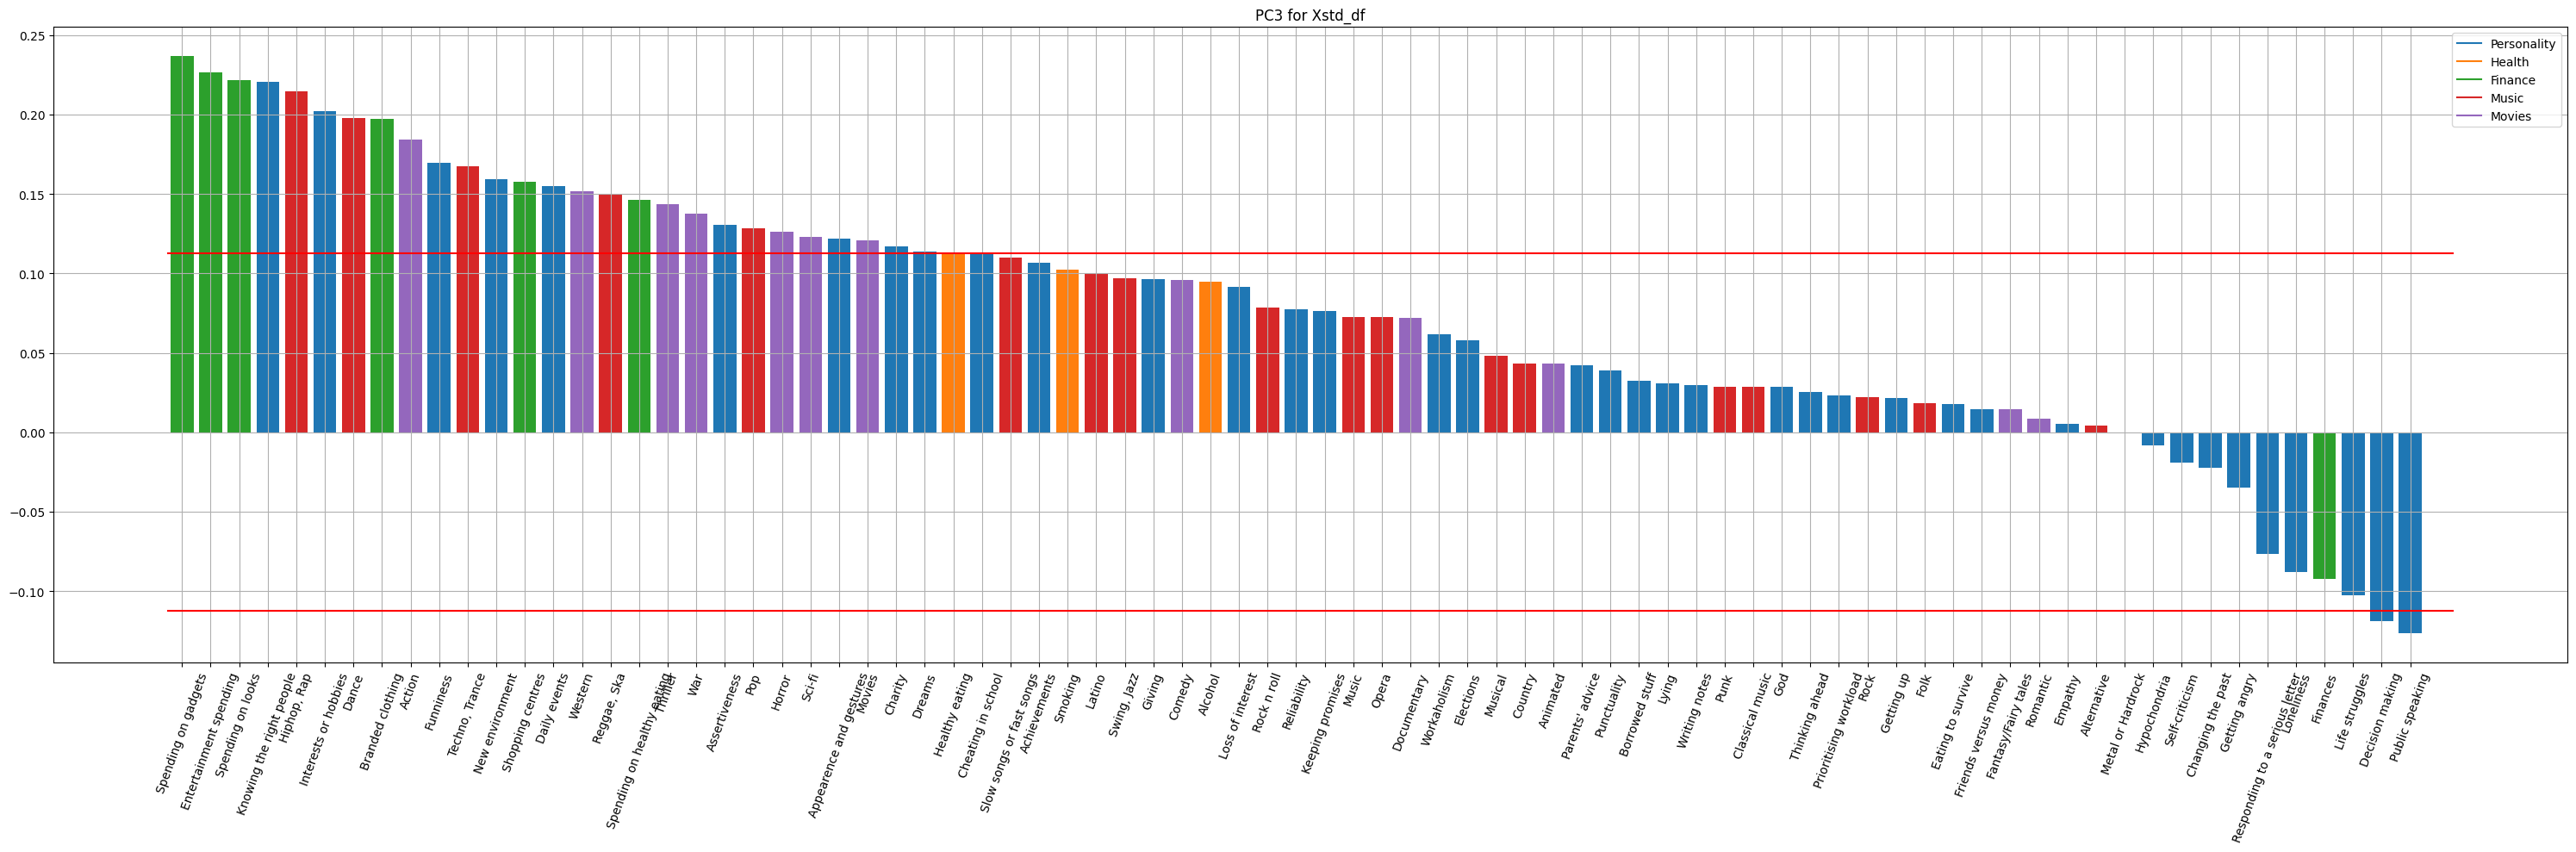

+ components ['Daily events', 'Dreams', 'Appearence and gestures', 'Interests or hobbies', 'Charity', 'Knowing the right people', 'Funniness', 'New environment', 'Assertiveness', 'Healthy eating', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating', 'Dance', 'Pop', 'Hiphop, Rap', 'Reggae, Ska', 'Techno, Trance', 'Movies', 'Horror', 'Thriller', 'Sci-fi', 'War', 'Western', 'Action']
- components ['Decision making', 'Public speaking']



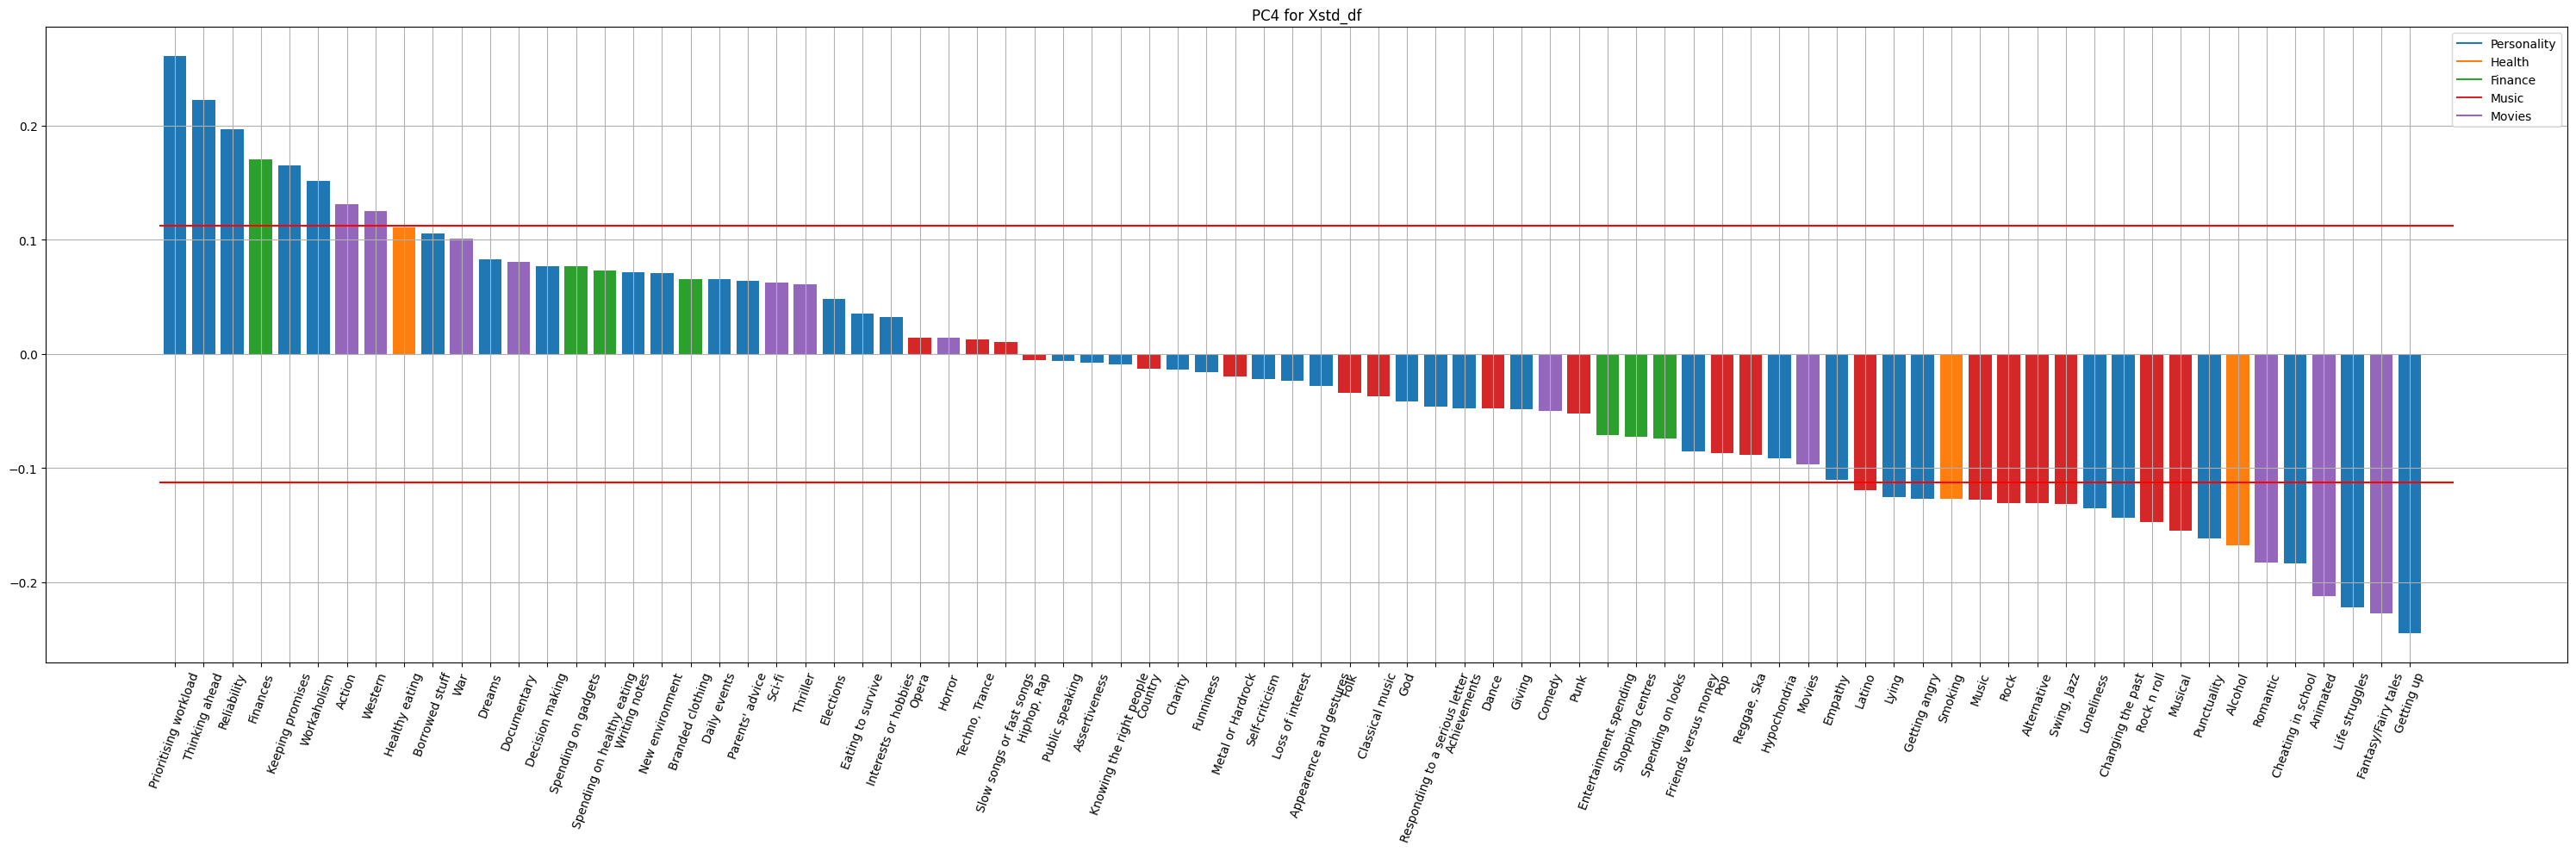

+ components ['Prioritising workload', 'Workaholism', 'Reliability', 'Keeping promises', 'Thinking ahead', 'Finances', 'Western', 'Action']
- components ['Cheating in school', 'Life struggles', 'Changing the past', 'Lying', 'Punctuality', 'Getting angry', 'Loneliness', 'Getting up', 'Smoking', 'Alcohol', 'Music', 'Musical', 'Rock', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Romantic', 'Fantasy/Fairy tales', 'Animated']



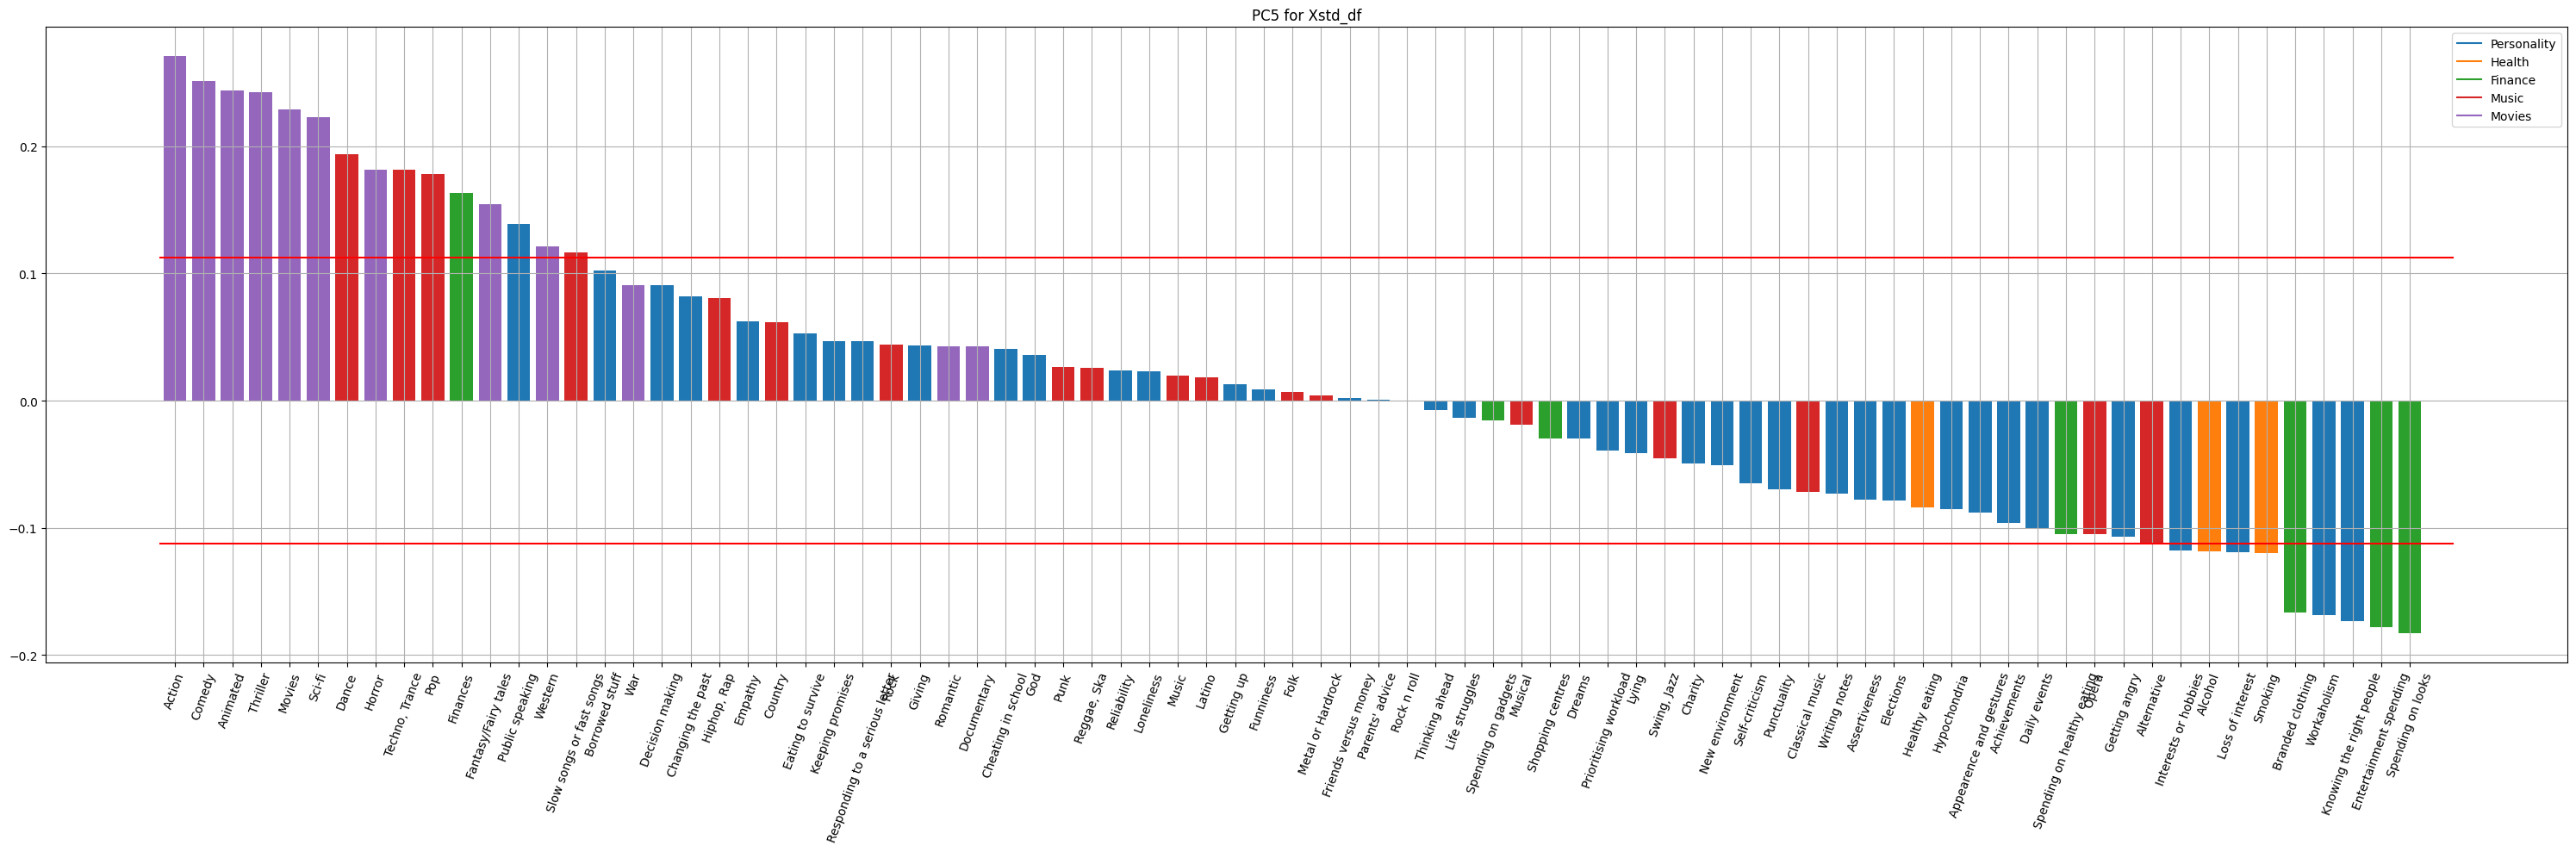

+ components ['Public speaking', 'Finances', 'Slow songs or fast songs', 'Dance', 'Pop', 'Techno, Trance', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Sci-fi', 'Fantasy/Fairy tales', 'Animated', 'Western', 'Action']
- components ['Workaholism', 'Interests or hobbies', 'Knowing the right people', 'Loss of interest', 'Smoking', 'Alcohol', 'Branded clothing', 'Entertainment spending', 'Spending on looks']



In [ ]:
# Print the components for the first 5 PCA applied to the Xstd

eps = np.sqrt(1/len(these_features))

for i in range(m_std):
  plt.figure(figsize=(30,10))
  newi = np.argsort(pca_std.components_[i, :])[::-1]
  plt.bar(np.arange(pca_std.n_features_in_), pca_std.components_[i, :][newi], color=[these_colors[j] for j in newi])
  plt.xticks(ticks=np.arange(pca_std.n_features_in_),
           labels=[these_features[j] for j in newi],
           rotation=70)
  plt.plot([-0.5,pca_std.n_features_in_+0.5], [eps, eps], color = 'red')
  plt.plot([-0.5,pca_std.n_features_in_+0.5], [-eps, -eps], color = 'red')
  plt.title(f'PC{i+1} for Xstd_df')
  plt.legend(colors_legend, [k for k in type_colors.keys()])
  plt.grid()
  plt.tight_layout()
  plt.show()

  print(f'+ components {[these_features[i] for i in np.argwhere(pca_std.components_[i,:]>= eps).flatten()]}')
  print(f'- components {[these_features[i] for i in np.argwhere(pca_std.components_[i,:]<= -eps).flatten()]}')

  print('')

We are making a profile for each of the 5 PCs corresponding to the most relevant (positive or negative) features that influence on them:
- PC1 'art lover and hard-working': a honest and hard-working person. He/she cares about others and likes old-time music.
- PC2 'musician and shy': a vibrant person who loves music, that is not pop.
- PC3 'fun-loving and big-spender': a person who prioritizes funniness, spending in selfcare and social events.
- PC4 'serious and healthy': a serious person who is inclined to work and to have a healthy lifestyle. He/she doen't like wild and rebellious music genres.
- PC5 'cinephile': a person who loves almost all type of movies but doesn't like to spend beauty and style.

In [ ]:
Xstd_label = {
    0 : 'art lover and hard-working',
    1 : 'musician and shy',
    2 : 'fun-loving and big-spender',
    3 : 'serious and healthy',
    4 : 'cinephile'
}

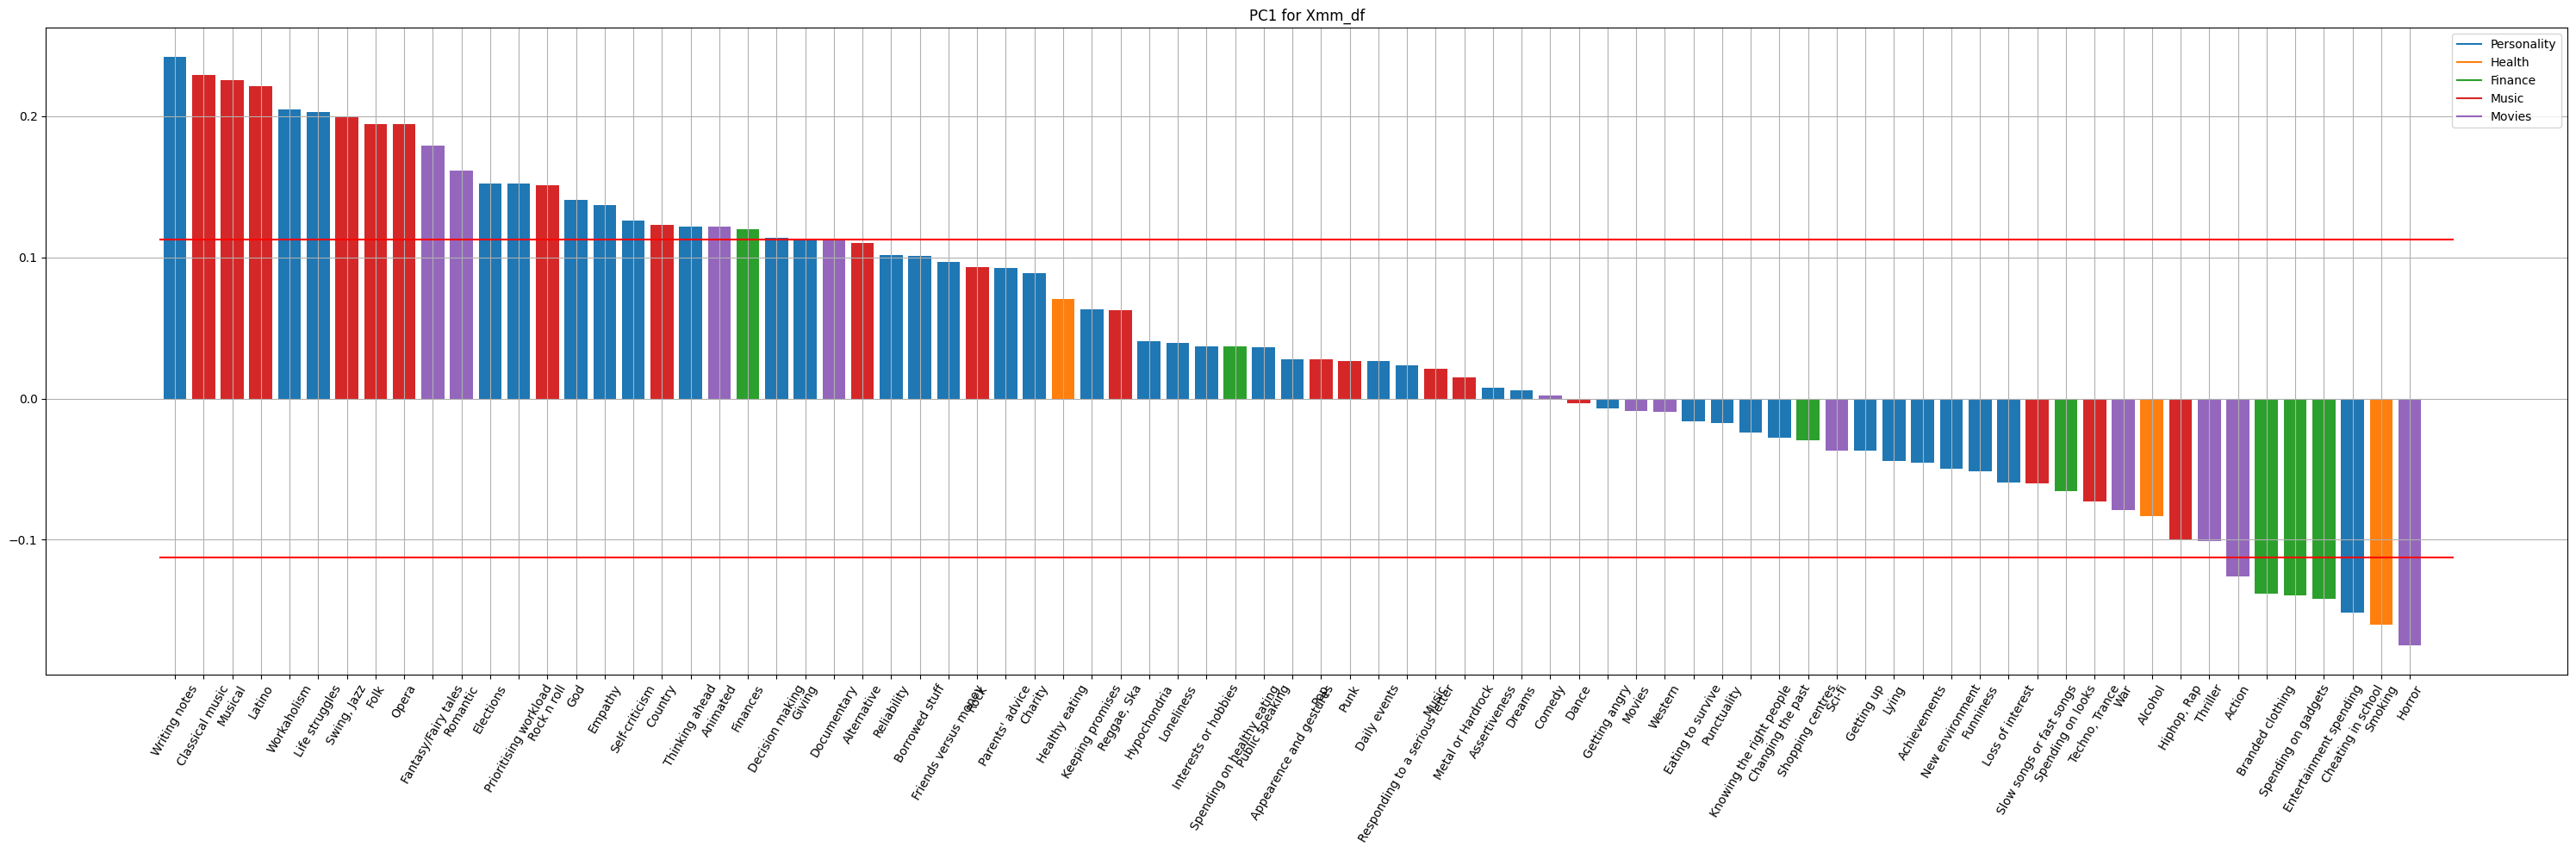

+ components ['Writing notes', 'Decision making', 'Life struggles', 'Prioritising workload', 'God', 'Empathy', 'Workaholism', 'Elections', 'Giving', 'Self-criticism', 'Thinking ahead', 'Finances', 'Folk', 'Country', 'Classical music', 'Musical', 'Swing, Jazz', 'Rock n roll', 'Latino', 'Opera', 'Romantic', 'Fantasy/Fairy tales', 'Animated', 'Documentary']
- components ['Cheating in school', 'Smoking', 'Branded clothing', 'Entertainment spending', 'Spending on gadgets', 'Horror', 'Action']



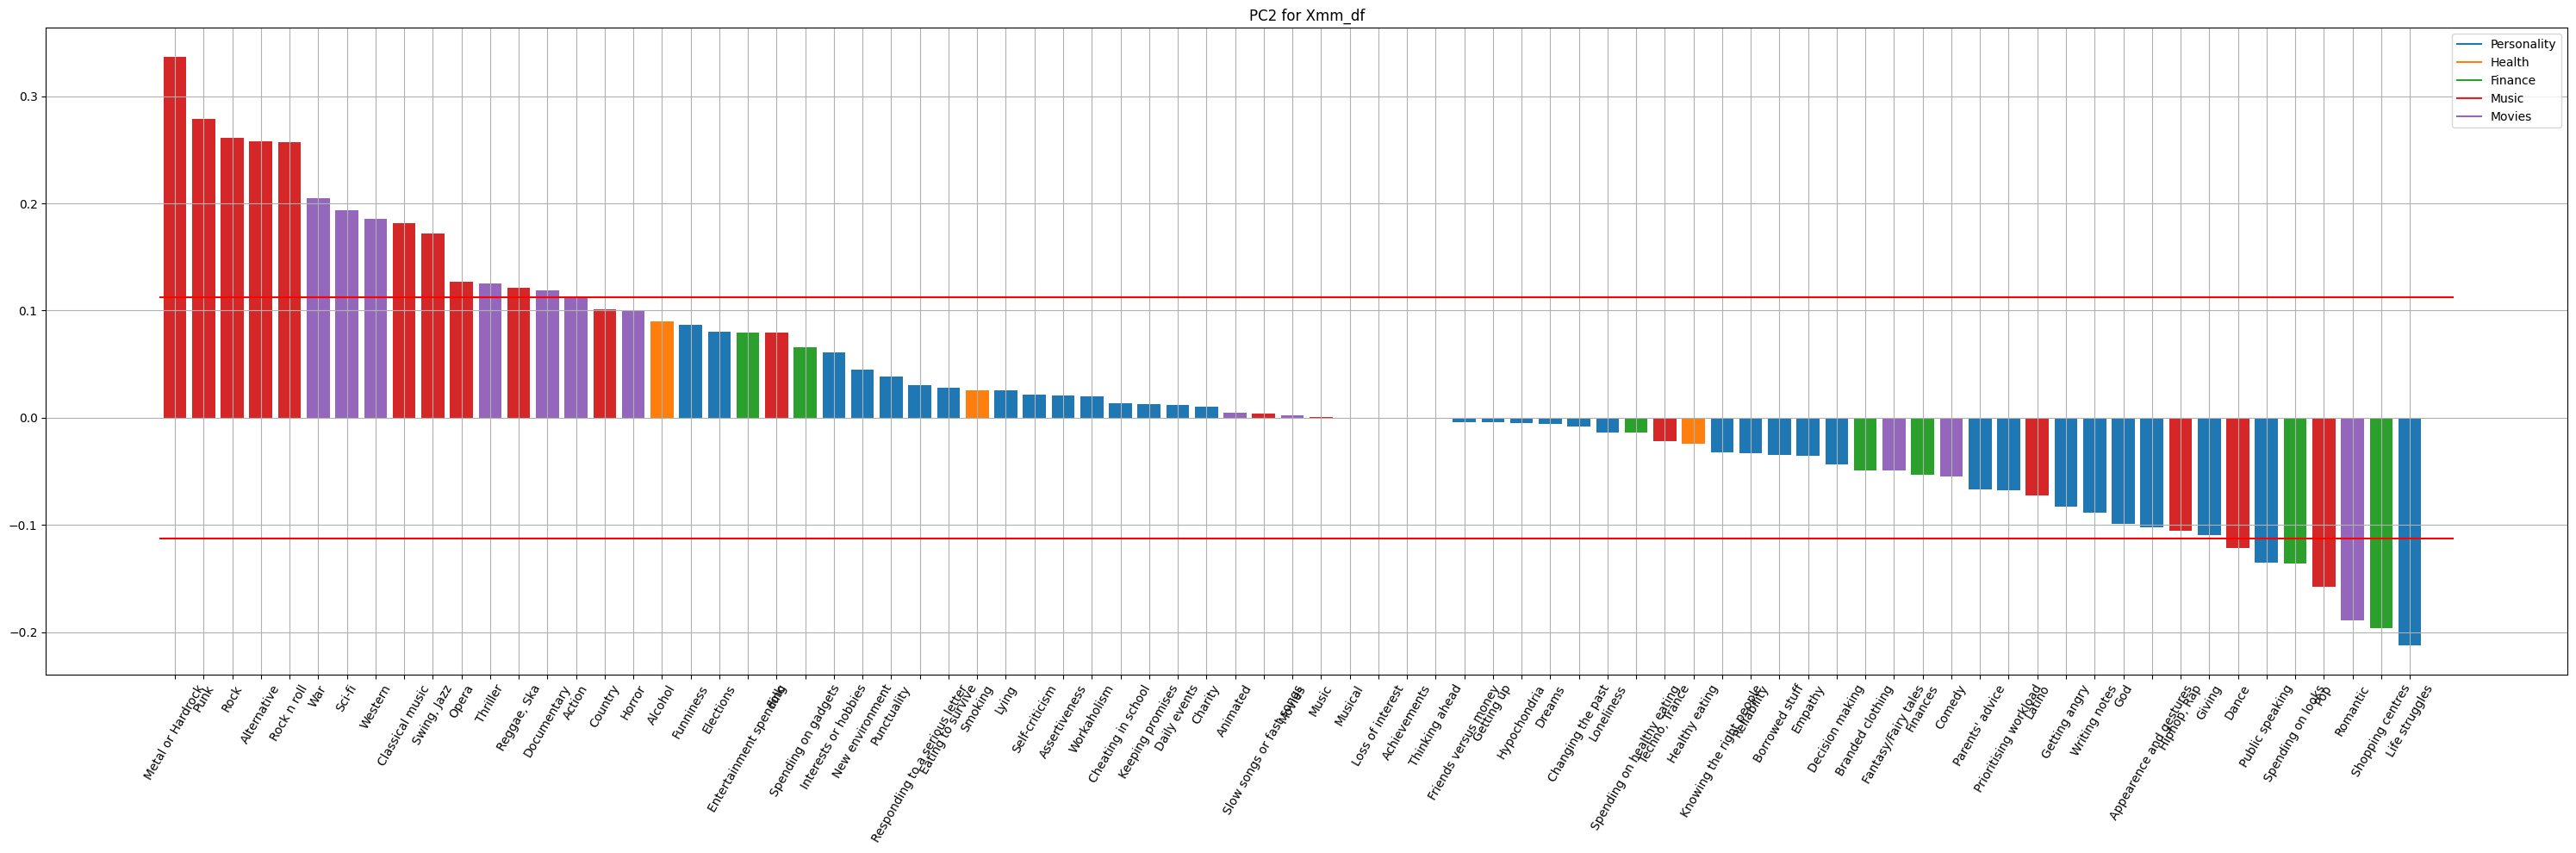

+ components ['Classical music', 'Rock', 'Metal or Hardrock', 'Punk', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Opera', 'Thriller', 'Sci-fi', 'War', 'Documentary', 'Western', 'Action']
- components ['Life struggles', 'Public speaking', 'Shopping centres', 'Spending on looks', 'Dance', 'Pop', 'Romantic']



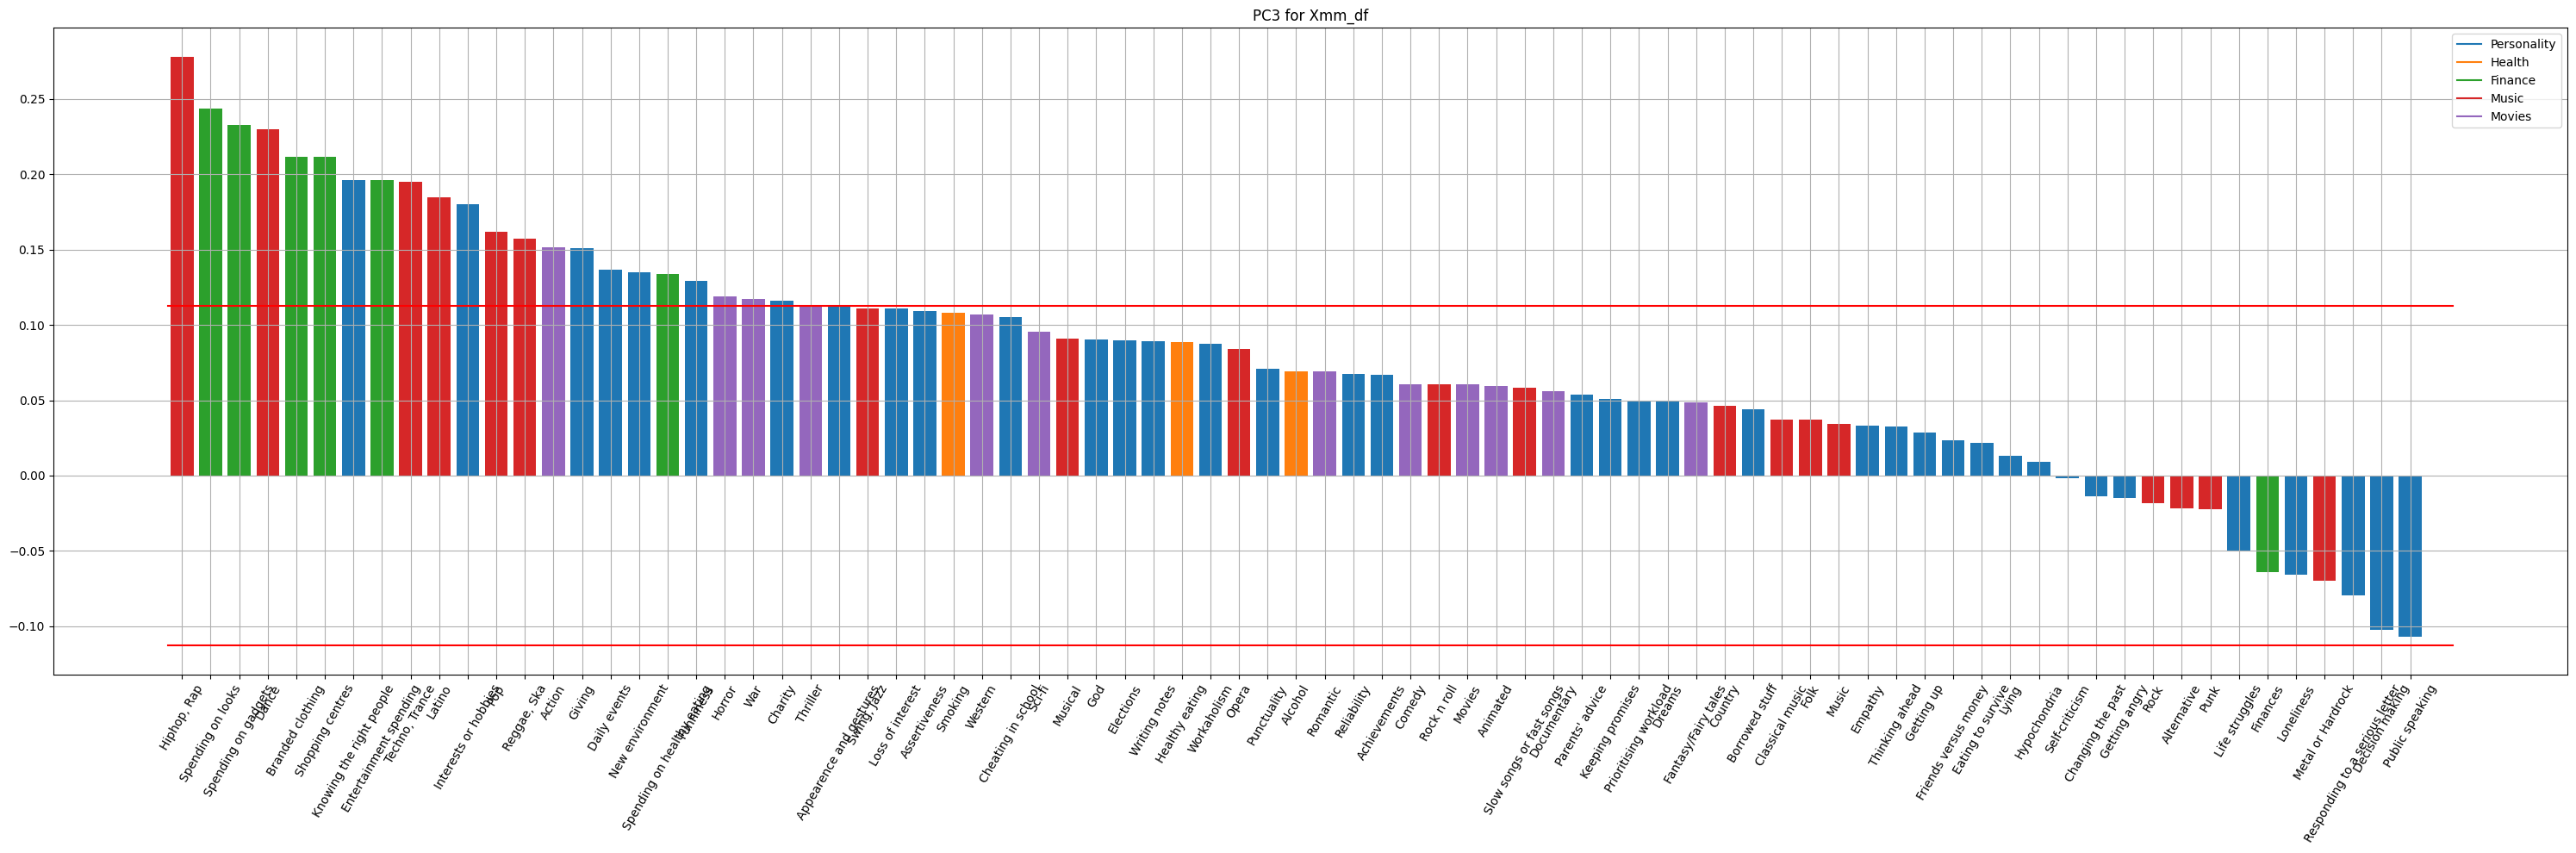

+ components ['Daily events', 'Interests or hobbies', 'Charity', 'Knowing the right people', 'Funniness', 'Giving', 'New environment', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating', 'Dance', 'Pop', 'Hiphop, Rap', 'Reggae, Ska', 'Latino', 'Techno, Trance', 'Horror', 'War', 'Action']
- components []



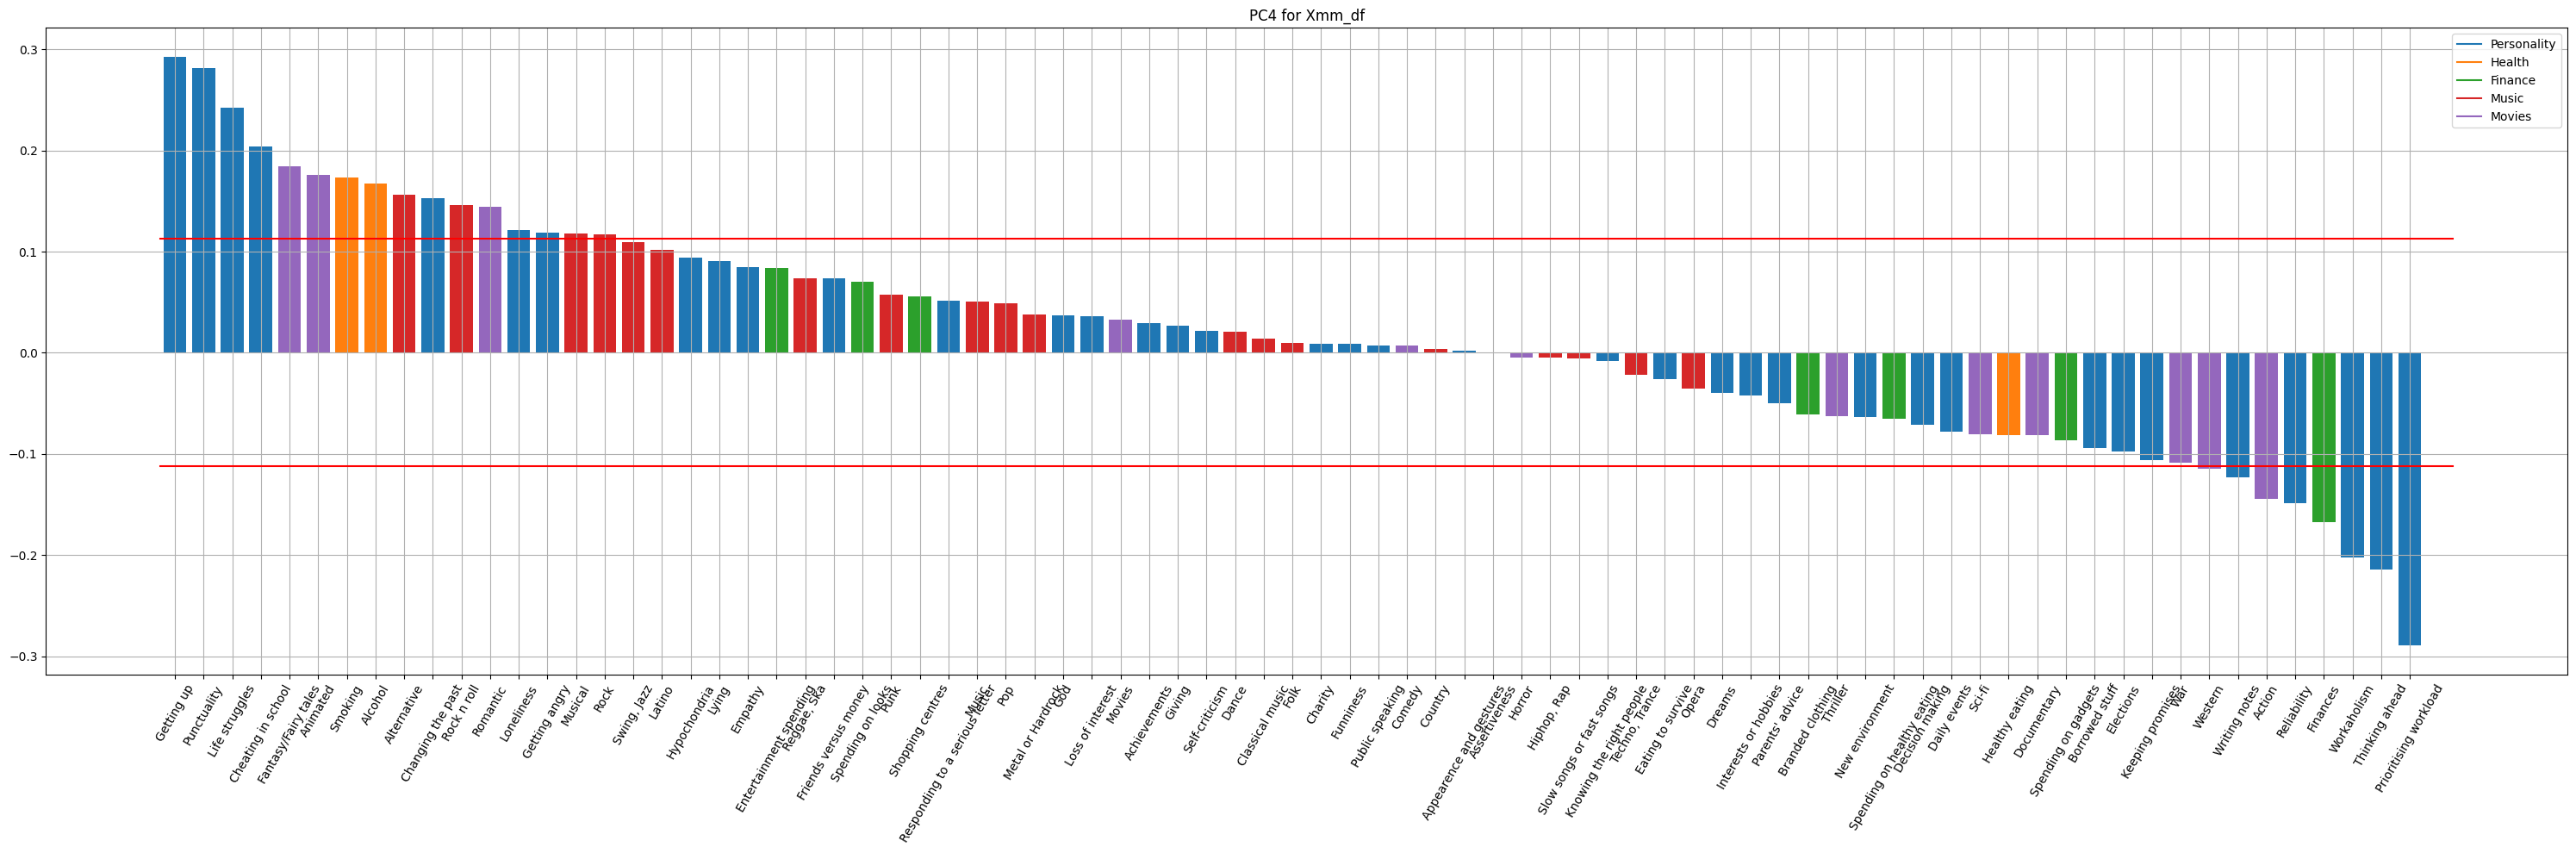

+ components ['Cheating in school', 'Life struggles', 'Changing the past', 'Punctuality', 'Getting angry', 'Loneliness', 'Getting up', 'Smoking', 'Alcohol', 'Musical', 'Rock', 'Rock n roll', 'Alternative', 'Romantic', 'Fantasy/Fairy tales', 'Animated']
- components ['Writing notes', 'Prioritising workload', 'Workaholism', 'Reliability', 'Thinking ahead', 'Finances', 'Western', 'Action']



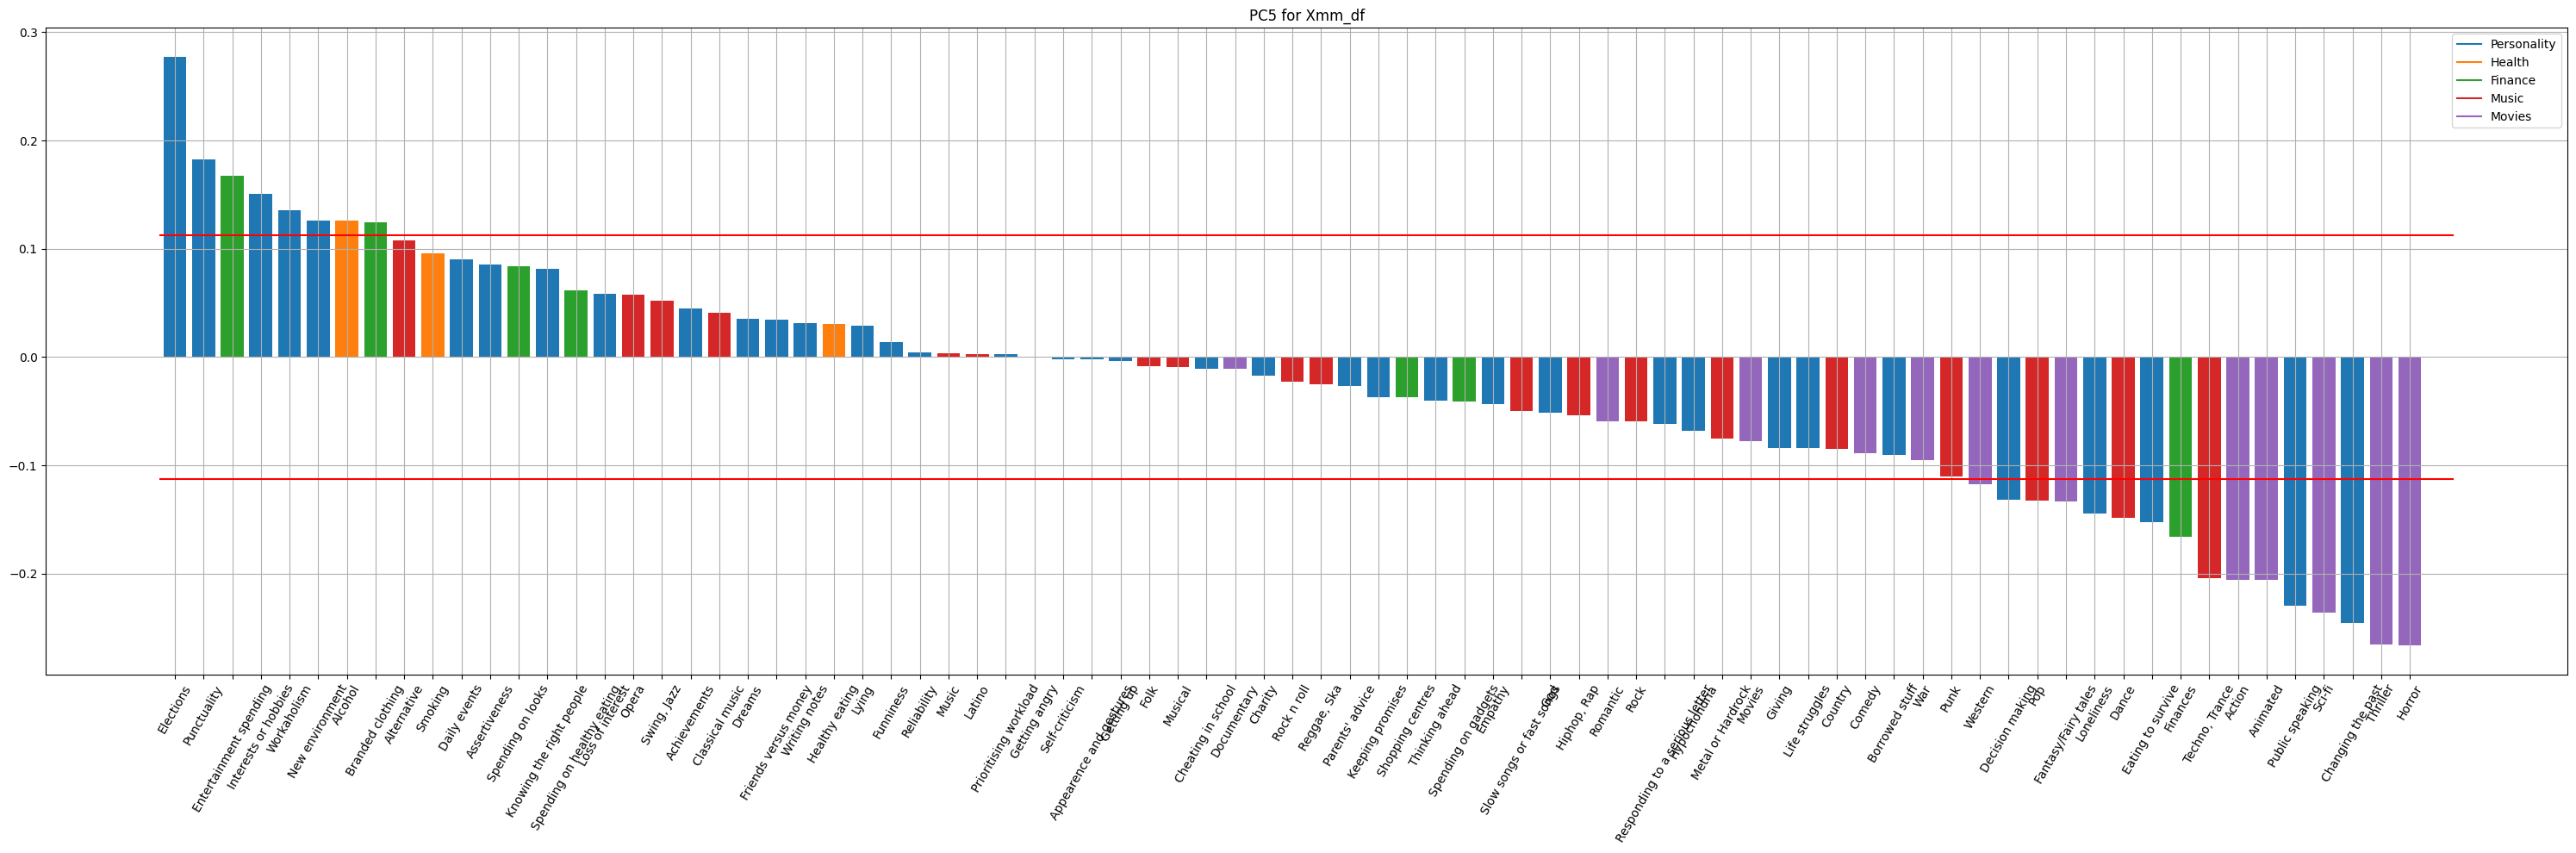

+ components ['Workaholism', 'Elections', 'Punctuality', 'Interests or hobbies', 'New environment', 'Alcohol', 'Branded clothing', 'Entertainment spending']
- components ['Eating to survive', 'Decision making', 'Changing the past', 'Public speaking', 'Loneliness', 'Finances', 'Dance', 'Pop', 'Techno, Trance', 'Horror', 'Thriller', 'Sci-fi', 'Fantasy/Fairy tales', 'Animated', 'Western', 'Action']



In [ ]:
eps = np.sqrt(1/len(these_features))

for i in range(m_mm):
  plt.figure(figsize=(30,10))
  newi = np.argsort(pca_mm.components_[i, :])[::-1]
  plt.bar(np.arange(pca_mm.n_features_in_), pca_mm.components_[i, :][newi], color=[these_colors[j] for j in newi])
  plt.xticks(ticks=np.arange(pca_mm.n_features_in_),
           labels=[these_features[j] for j in newi],
           rotation=60)
  plt.plot([-0.5,pca_mm.n_features_in_+0.5], [eps, eps], color = 'red')
  plt.plot([-0.5,pca_mm.n_features_in_+0.5], [-eps, -eps], color = 'red')
  plt.title(f'PC{i+1} for Xmm_df')
  plt.legend(colors_legend, [k for k in type_colors.keys()])
  plt.grid()
  plt.tight_layout()
  plt.show()

  print(f'+ components {[these_features[i] for i in np.argwhere(pca_mm.components_[i,:]>= eps).flatten()]}')
  print(f'- components {[these_features[i] for i in np.argwhere(pca_mm.components_[i,:]<= -eps).flatten()]}')

  print('')


We are making a profile for each of the 5 PCs corresponding to the most relevant (positive or negative) features that influence on them:
- PC1 'altruistic and hard-working': a hard-working, honest and religious persor who likes old-time music but not horror and action movies. He/She prefers saving money instead of spending them on entertainment and self-care. He/she likes documentary and fantasy but not horror movies.
- PC2 'rebellious and edgy': a rebellious and edgy person who doesn't like being conformist
- PC3 'extrovert and conformist': a person with a strong caracter who enjoys staying in contact with new enviroments and new people. He/she also has mainstream preferences in music or movies and a tendency to shop.
- PC4 'alternative and unreliable': a person who likes having fun but isn't reliable at work even if he/she is punctual.
- PC5 'hard-working and outgoing': a hard-working, punctual person who doesn't like movies. He/she is also interested also in politics, different hobbies and spending on alcohol and branded clothing.

In [ ]:
Xmm_label = {
    0: 'altruistic and hard-working',
    1: 'rebellious and edgy',
    2: 'extrovert and conformist',
    3: 'alternative and unreliable',
    4: 'hard-working and outgoing'
}

Therefore, we can make a comparison of the PCs obtained from the two datasets:
- PC1 of Xstd and PC1 of Xmm are quite similar; however, the latter highlights a more altruistic and compassionate aspect of the individual.
- PC2s detect a person who loves music, but in the two cases the musical tastes are different.
- PC3 are quite similar because both represent a really friendly people.
- Finally, both PC4 and PC5 of Xstd appears to represent profiles opposite to those depicted by respectively PC4 and PC5 of Xmm.

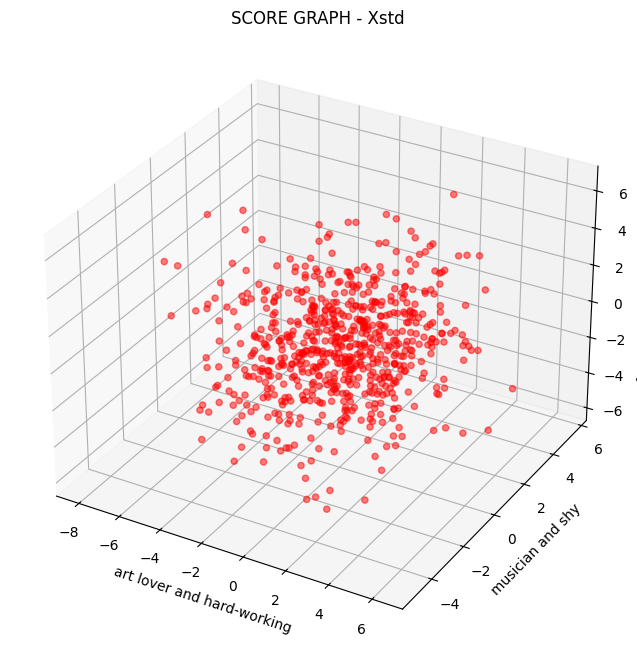

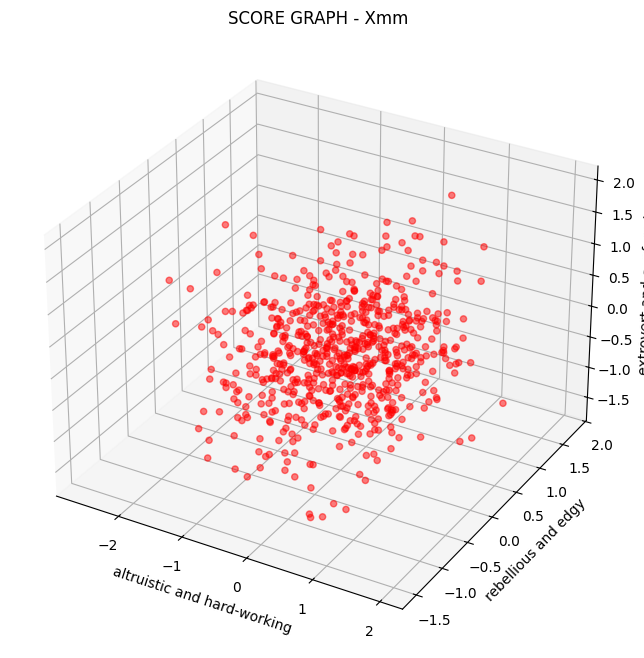

In [ ]:
# Plot the score graph

Xstd_transform = pca_std.transform(Xstd_df)
Xmm_transform = pca_mm.transform(Xmm_df)

sg_3d = plt.figure(figsize=(8, 8))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter([el[0] for el in Xstd_transform], [el[1] for el in Xstd_transform], [el[2] for el in Xstd_transform], color='r', alpha=0.5)
plt.title('SCORE GRAPH - Xstd')
ax_sg_3d.set_xlabel(Xstd_label[0])
ax_sg_3d.set_ylabel(Xstd_label[1])
ax_sg_3d.set_zlabel(Xstd_label[2])
plt.grid()
plt.show()

sg_3d = plt.figure(figsize=(8, 8))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter([el[0] for el in Xmm_transform], [el[1] for el in Xmm_transform], [el[2] for el in Xmm_transform], color='r', alpha=0.5)
plt.title('SCORE GRAPH - Xmm')
ax_sg_3d.set_xlabel(Xmm_label[0])
ax_sg_3d.set_ylabel(Xmm_label[1])
ax_sg_3d.set_zlabel(Xmm_label[2])
plt.grid()
plt.show()

In [ ]:
mask = ~responses_df_all.loc[casual_index, 'Gender'].isna()
gender = responses_df_all.loc[casual_index, 'Gender'][mask]
gender.unique()

array(['female', 'male'], dtype=object)

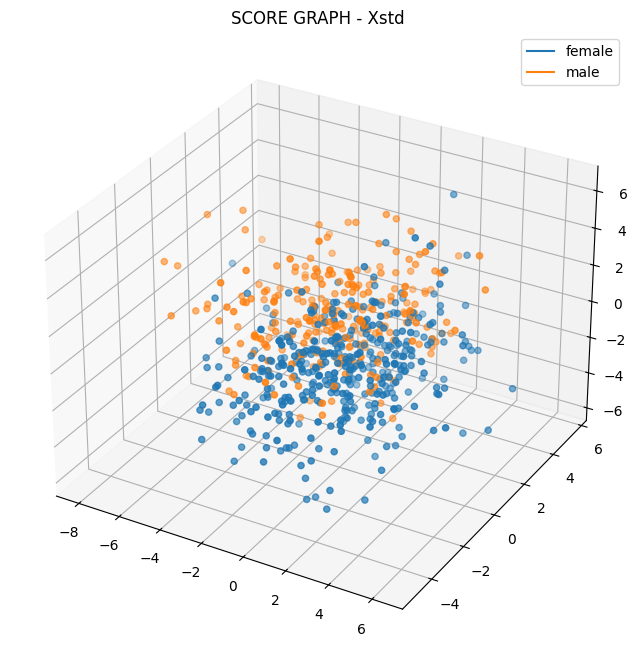

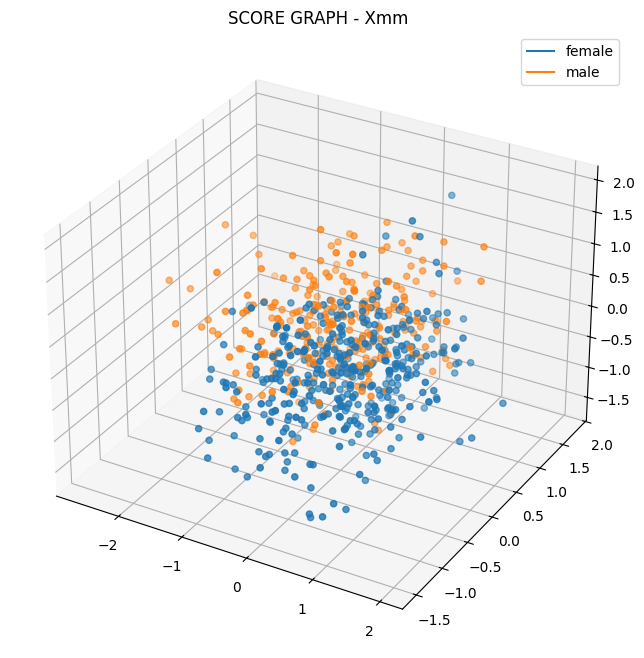

In [ ]:
# Plot the score graph - gender

Xstd_transform_gender = Xstd_transform[mask]
Xmm_transform_gender = Xmm_transform[mask]

type_colors_gender = {
    'female' : tab[0],
    'male' : tab[1]
}
gender_colors = gender.map(type_colors_gender)
colors_legend_gender = [Line2D([0], [0], color=type_colors_gender[k]) for k in type_colors_gender.keys()]

sg_3d_1 = plt.figure(figsize=(8, 8))
ax_sg_3d_1 = sg_3d_1.add_subplot(111, projection='3d')
ax_sg_3d_1.scatter([el[0] for el in Xstd_transform_gender], [el[1] for el in Xstd_transform_gender], [el[2] for el in Xstd_transform_gender], c=gender_colors)
plt.legend(colors_legend_gender, [k for k in type_colors_gender.keys()])
plt.title(f'SCORE GRAPH - Xstd')
plt.grid()
plt.show()

sg_3d_2 = plt.figure(figsize=(8, 8))
ax_sg_3d_2 = sg_3d_2.add_subplot(111, projection='3d')
ax_sg_3d_2.scatter([el[0] for el in Xmm_transform_gender], [el[1] for el in Xmm_transform_gender], [el[2] for el in Xmm_transform_gender], c=gender_colors)
plt.legend(colors_legend_gender, [k for k in type_colors_gender.keys()])
plt.title(f'SCORE GRAPH - Xmm')
plt.grid()
plt.show()

The clusterings through gender are poor, but we can select an upper-left region populated mostly by males while the bottom-right by women in both the two score graphes. This division is visualized better in the score graph of the _Xstd_df_.

In [ ]:
mask = ~responses_df_all.loc[casual_index, 'Education'].isna()
education = responses_df_all.loc[casual_index, 'Education'][mask]
education.unique()

array(['secondary school', 'college/bachelor degree', 'masters degree',
       'primary school', 'currently a primary school pupil',
       'doctorate degree'], dtype=object)

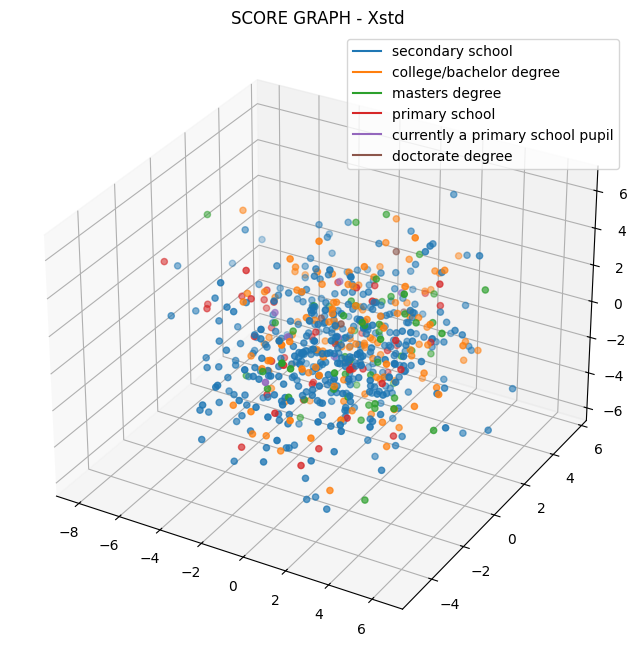

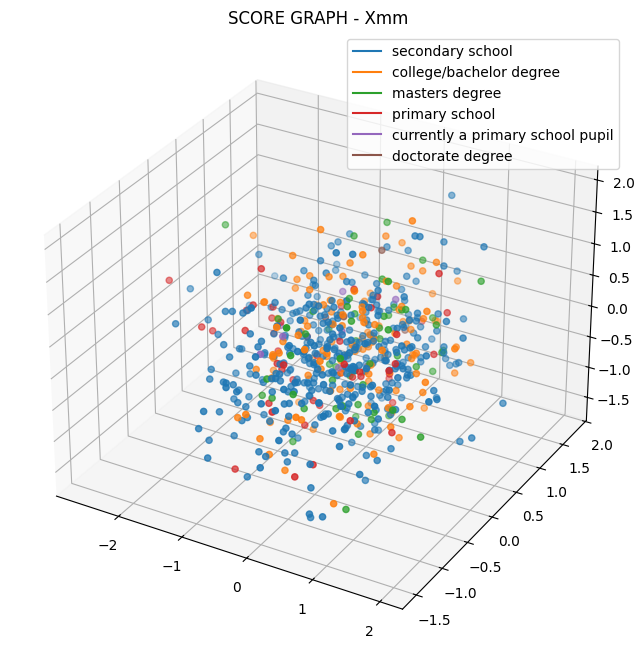

In [ ]:
# Plot the score graph - education

Xstd_transform_education = Xstd_transform[mask]
Xmm_transform_education = Xmm_transform[mask]

type_colors_education = {
    'secondary school': tab[0],
    'college/bachelor degree': tab[1],
    'masters degree': tab[2],
    'primary school': tab[3],
    'currently a primary school pupil': tab[4],
    'doctorate degree': tab[5]
}
education_colors = education.map(type_colors_education)
colors_legend_education = [Line2D([0], [0], color=type_colors_education[k]) for k in type_colors_education.keys()]

sg_3d_1 = plt.figure(figsize=(8, 8))
ax_sg_3d_1 = sg_3d_1.add_subplot(111, projection='3d')
ax_sg_3d_1.scatter([el[0] for el in Xstd_transform_education], [el[1] for el in Xstd_transform_education], [el[2] for el in Xstd_transform_education], c=education_colors)
plt.legend(colors_legend_education, [k for k in type_colors_education.keys()])
plt.title(f'SCORE GRAPH - Xstd')
plt.grid()
plt.show()

sg_3d_2 = plt.figure(figsize=(8, 8))
ax_sg_3d_2 = sg_3d_2.add_subplot(111, projection='3d')
ax_sg_3d_2.scatter([el[0] for el in Xmm_transform_education], [el[1] for el in Xmm_transform_education], [el[2] for el in Xmm_transform_education], c=education_colors)
plt.legend(colors_legend_education, [k for k in type_colors_education.keys()])
plt.title(f'SCORE GRAPH - Xmm')
plt.grid()
plt.show()

Both the score graphes provide really bad clusterings for our records, therefore education seems not to help us to find classes for the dataset.

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

_Xstd_df_

In [ ]:
# Find the k with the best k-Means
silh_std = {}
for k in range(3, 11):
  km = KMeans(n_clusters=k, random_state=42)
  y_pred = km.fit_predict(Xstd_transform)
  silh_std[k] = (silhouette_score(Xstd_transform, y_pred), km)

k_optimal_std = max(silh_std, key=lambda k: silh_std[k][0])
km_opt_std = silh_std[k_optimal_std][1]

print(f'The highest silhouette performed with k-Means is k={k_optimal_std}')

The highest silhouette performed with k-Means is k=3


In [ ]:
# Centroid for Xstd

for el in km_opt_std.cluster_centers_:
  for i in range(3):
    print(f'{Xstd_label[i]} -> {el[i]}')
  print('')

art lover and hard-working -> 0.661804313068506
musician and shy -> 1.304266710643668
fun-loving and big-spender -> -1.6235391367315941

art lover and hard-working -> -2.3577788229448298
musician and shy -> -0.9250186599690252
fun-loving and big-spender -> -0.025177748978435183

art lover and hard-working -> 1.551830826377513
musician and shy -> -0.43579940979938697
fun-loving and big-spender -> 1.6471776346807787



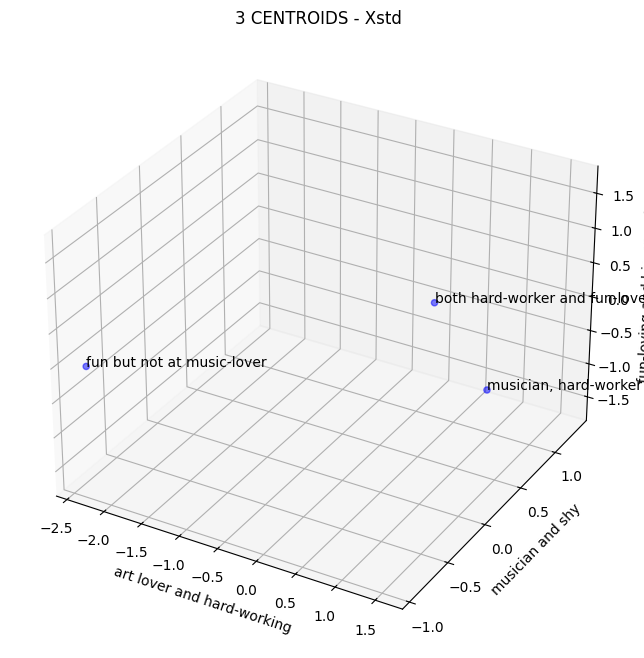

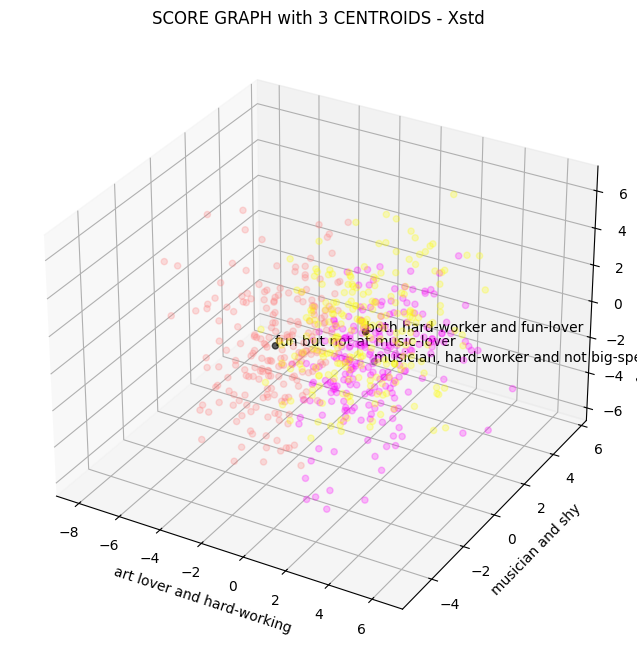

In [ ]:
# Plot the clusters' center

sg_3d = plt.figure(figsize=(8, 8))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')

labels_centroids = ['musician, hard-worker and not big-spender','fun but not at music-lover','both hard-worker and fun-lover']
ax_sg_3d.scatter(km_opt_std.cluster_centers_[:, 0], km_opt_std.cluster_centers_[:, 1], km_opt_std.cluster_centers_[:, 2], color='b', alpha=0.5)
ax_sg_3d.text(km_opt_std.cluster_centers_[0, 0], km_opt_std.cluster_centers_[0, 1], km_opt_std.cluster_centers_[0, 2], labels_centroids[0])
ax_sg_3d.text(km_opt_std.cluster_centers_[1, 0], km_opt_std.cluster_centers_[1, 1], km_opt_std.cluster_centers_[1, 2], labels_centroids[1])
ax_sg_3d.text(km_opt_std.cluster_centers_[2, 0], km_opt_std.cluster_centers_[2, 1], km_opt_std.cluster_centers_[2, 2], labels_centroids[2])
plt.title(f'{k_optimal_std} CENTROIDS - Xstd')
ax_sg_3d.set_xlabel(Xstd_label[0])
ax_sg_3d.set_ylabel(Xstd_label[1])
ax_sg_3d.set_zlabel(Xstd_label[2])
plt.show()

# Plot the score graph
sg_3d_1 = plt.figure(figsize=(8, 8))
ax_sg_3d_1 = sg_3d_1.add_subplot(111, projection='3d')
ax_sg_3d_1.scatter([el[0] for el in Xstd_transform], [el[1] for el in Xstd_transform], [el[2] for el in Xstd_transform], c=km_opt_std.labels_, cmap='spring', alpha=0.25)
ax_sg_3d_1.scatter(km_opt_std.cluster_centers_[:, 0], km_opt_std.cluster_centers_[:, 1], km_opt_std.cluster_centers_[:, 2], color='black')
ax_sg_3d_1.text(km_opt_std.cluster_centers_[0, 0], km_opt_std.cluster_centers_[0, 1], km_opt_std.cluster_centers_[0, 2], labels_centroids[0])
ax_sg_3d_1.text(km_opt_std.cluster_centers_[1, 0], km_opt_std.cluster_centers_[1, 1], km_opt_std.cluster_centers_[1, 2], labels_centroids[1])
ax_sg_3d_1.text(km_opt_std.cluster_centers_[2, 0], km_opt_std.cluster_centers_[2, 1], km_opt_std.cluster_centers_[2, 2], labels_centroids[2])
plt.title(f'SCORE GRAPH with {k_optimal_std} CENTROIDS - Xstd')
ax_sg_3d_1.set_xlabel(Xstd_label[0])
ax_sg_3d_1.set_ylabel(Xstd_label[1])
ax_sg_3d_1.set_zlabel(Xstd_label[2])
plt.grid()
plt.show()


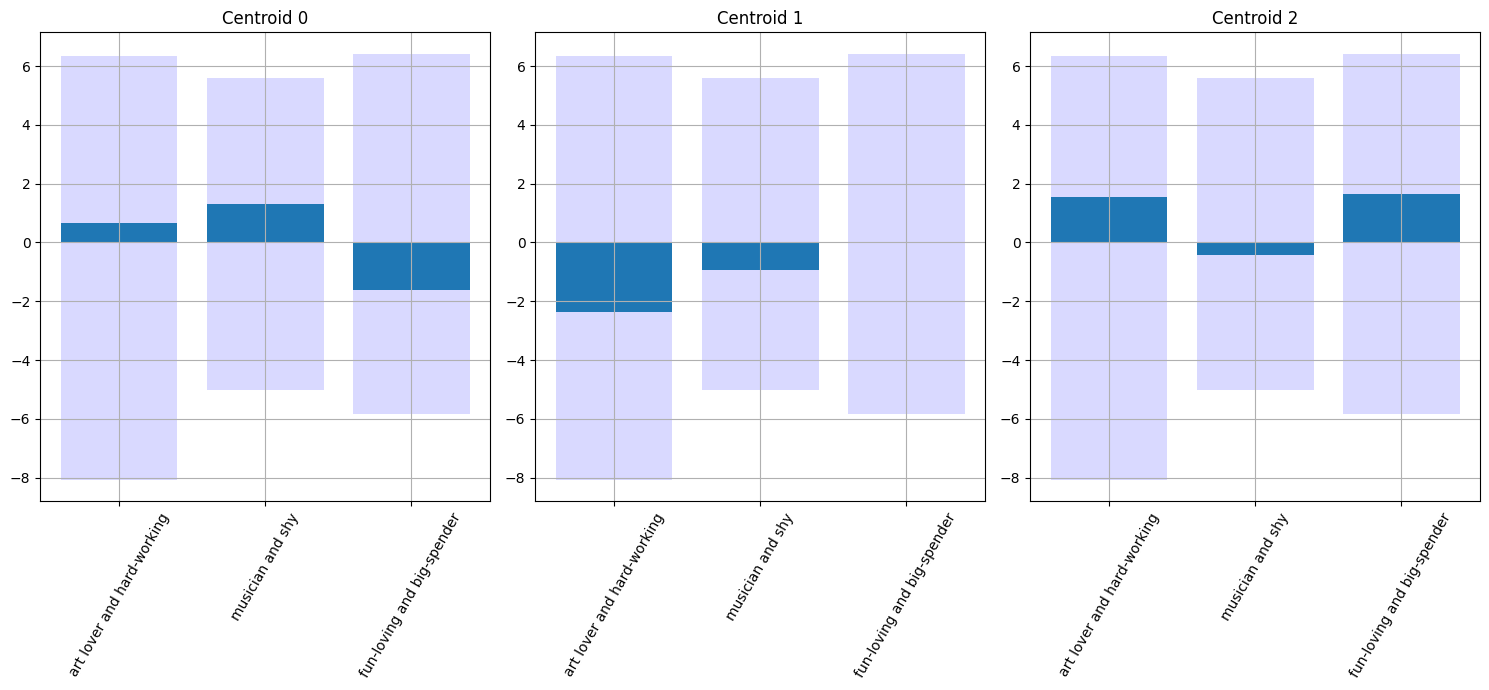

In [ ]:
# Plot the the variance for each centroid

max_std = Xstd_transform.max(axis=0)
min_std = Xstd_transform.min(axis=0)

fig, ax = plt.subplots(1,3, figsize=(15,7))
for i in range(k_optimal_std):
  ax[i].bar(np.arange(3), max_std[:3], color='blue', alpha = 0.15)
  ax[i].bar(np.arange(3), min_std[:3], color='blue', alpha = 0.15)
  ax[i].bar(np.arange(3), km_opt_std.cluster_centers_[i,:3])
  ax[i].set_xticks(ticks=np.arange(3))
  ax[i].set_xticklabels([Xstd_label[i] for i in range(3)], rotation=60)
  ax[i].grid(visible=True, which='both')
  ax[i].set_title(f'Centroid {i}')
plt.tight_layout()
plt.show()

In [ ]:
# # Find the k with the best k-Means

silh_mm = {}
for k in range(3, 11):
  km_mm = KMeans(n_clusters=k, random_state=42)
  y_pred_mm = km_mm.fit_predict(Xmm_transform)
  silh_mm[k] = (silhouette_score(Xmm_transform, y_pred_mm), km_mm)

k_optimal_mm = max(silh_mm, key=lambda k: silh_mm[k][0])
km_opt_mm = silh_mm[k_optimal_mm][1]
print(f'The highest silhouette performed with k-Means is k={k_optimal_std}')

The highest silhouette performed with k-Means is k=3


In [ ]:
# Centroid for Xmm

for el in km_opt_mm.cluster_centers_:
  for i in range(3):
    print(f'{Xmm_label[i]} -> {el[i]}')
  print('')

altruistic and hard-working -> 0.3503725905084065
rebellious and edgy -> 0.28063695372224284
extrovert and conformist -> -0.48071121261739375

altruistic and hard-working -> -0.7210448496104299
rebellious and edgy -> -0.2400189129716776
extrovert and conformist -> -0.043944246042106956

altruistic and hard-working -> 0.38634834533762147
rebellious and edgy -> -0.06246881382896848
extrovert and conformist -> 0.608475897474432



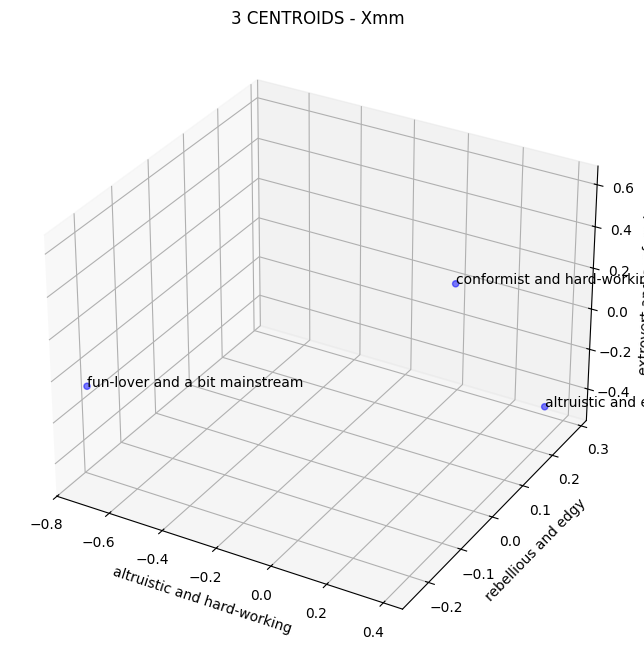

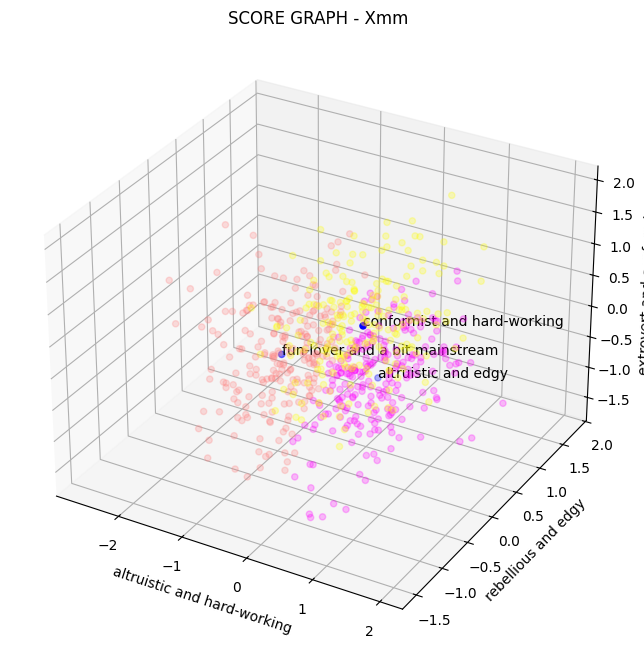

In [ ]:
# Plot the centroids

sg_3d_mm = plt.figure(figsize=(8, 8))
ax_sg_3d_mm = sg_3d_mm.add_subplot(111, projection='3d')
labels_centroids_mm = ['altruistic and edgy', 'fun-lover and a bit mainstream', 'conformist and hard-working']
ax_sg_3d_mm.scatter(km_opt_mm.cluster_centers_[:, 0], km_opt_mm.cluster_centers_[:, 1], km_opt_mm.cluster_centers_[:, 2], color='b', alpha=0.5)
ax_sg_3d_mm.text(km_opt_mm.cluster_centers_[0, 0], km_opt_mm.cluster_centers_[0, 1], km_opt_mm.cluster_centers_[0, 2], labels_centroids_mm[0])
ax_sg_3d_mm.text(km_opt_mm.cluster_centers_[1, 0], km_opt_mm.cluster_centers_[1, 1], km_opt_mm.cluster_centers_[1, 2], labels_centroids_mm[1])
ax_sg_3d_mm.text(km_opt_mm.cluster_centers_[2, 0], km_opt_mm.cluster_centers_[2, 1], km_opt_mm.cluster_centers_[2, 2], labels_centroids_mm[2])
plt.title(f'{k_optimal_mm} CENTROIDS - Xmm')
ax_sg_3d_mm.set_xlabel(Xmm_label[0])
ax_sg_3d_mm.set_ylabel(Xmm_label[1])
ax_sg_3d_mm.set_zlabel(Xmm_label[2])
plt.show()

# Plot the score graph
sg_3d_1_mm = plt.figure(figsize=(8, 8))
ax_sg_3d_1_mm = sg_3d_1_mm.add_subplot(111, projection='3d')
ax_sg_3d_1_mm.scatter([el[0] for el in Xmm_transform], [el[1] for el in Xmm_transform], [el[2] for el in Xmm_transform], c=km_opt_mm.labels_, cmap='spring', alpha=0.25)
ax_sg_3d_1_mm.scatter(km_opt_mm.cluster_centers_[:, 0], km_opt_mm.cluster_centers_[:, 1], km_opt_mm.cluster_centers_[:, 2], color='b')
ax_sg_3d_1_mm.text(km_opt_mm.cluster_centers_[0, 0], km_opt_mm.cluster_centers_[0, 1], km_opt_mm.cluster_centers_[0, 2], labels_centroids_mm[0])
ax_sg_3d_1_mm.text(km_opt_mm.cluster_centers_[1, 0], km_opt_mm.cluster_centers_[1, 1], km_opt_mm.cluster_centers_[1, 2], labels_centroids_mm[1])
ax_sg_3d_1_mm.text(km_opt_mm.cluster_centers_[2, 0], km_opt_mm.cluster_centers_[2, 1], km_opt_mm.cluster_centers_[2, 2], labels_centroids_mm[2])
plt.title(f'SCORE GRAPH - Xmm')
ax_sg_3d_1_mm.set_xlabel(Xmm_label[0])
ax_sg_3d_1_mm.set_ylabel(Xmm_label[1])
ax_sg_3d_1_mm.set_zlabel(Xmm_label[2])
plt.grid()
plt.show()

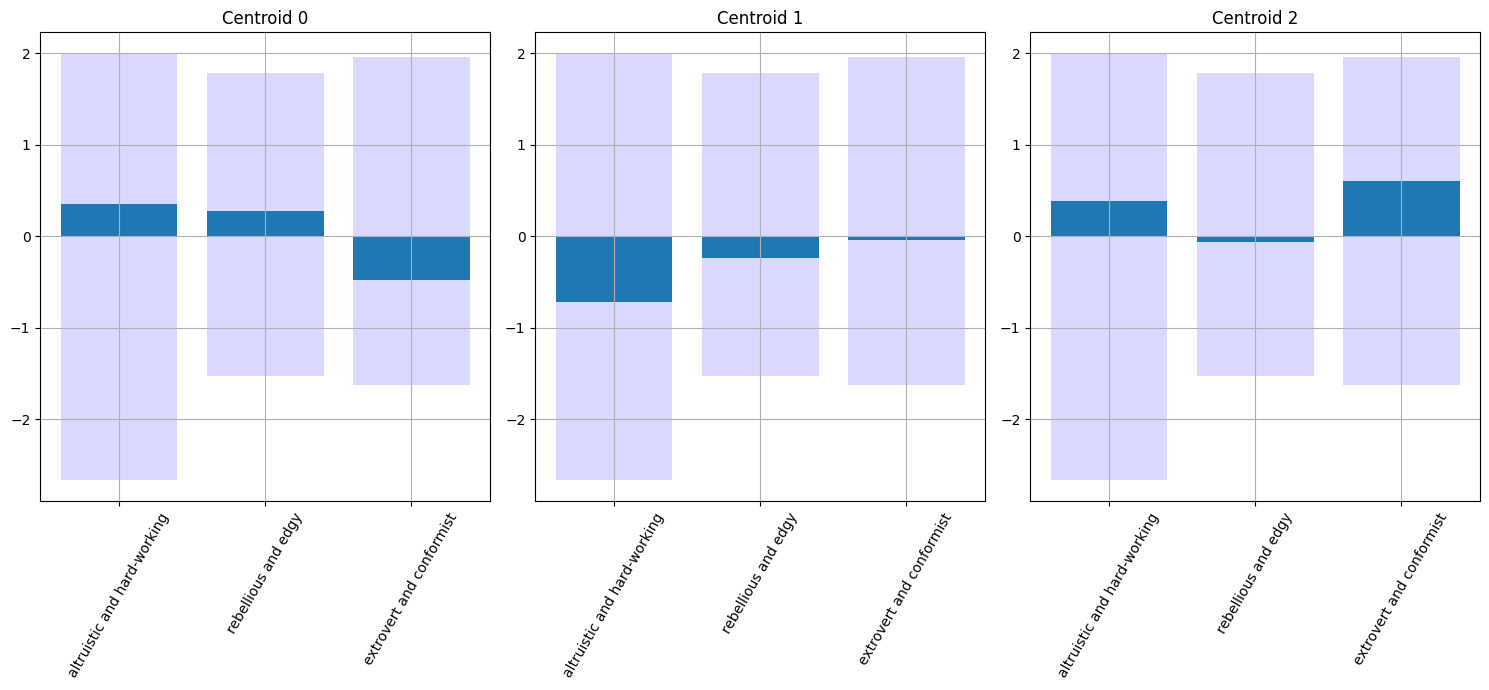

In [ ]:
# Plot the the variance for each centroid

max_mm = Xmm_transform.max(axis=0)
min_mm = Xmm_transform.min(axis=0)

fig, ax = plt.subplots(1,3, figsize=(15,7))
for i in range(k_optimal_mm):
  ax[i].bar(np.arange(3), max_mm[:3], color='blue', alpha = 0.15)
  ax[i].bar(np.arange(3), min_mm[:3], color='blue', alpha = 0.15)
  ax[i].bar(np.arange(3), km_opt_mm.cluster_centers_[i,:3])
  ax[i].set_xticks(ticks=np.arange(3))
  ax[i].set_xticklabels([Xmm_label[i] for i in range(3)], rotation=60)
  ax[i].grid(visible=True, which='both')
  ax[i].set_title(f'Centroid {i}')
plt.tight_layout()
plt.show()

In [ ]:
print(f'silhouette score of X_std with 3 clusters -> {silh_std[k_optimal_std][0]}')
print(f'silhouette score of X_mm with 3 clusters -> {silh_mm[k_optimal_mm][0]}')

silhouette score of X_std with 3 clusters -> 0.03565990753433516
silhouette score of X_mm with 3 clusters -> 0.03672139019924076


Given the two types of clustering, difficulties were encountered in finding appropriate names for certain centroids due to contradictions. For example, in the centroid named 'fun-lover and a bit mainstream' in the score graph of X_mm, both 'rebellious and edgy' component the 'extrovert and conformist' component have a negative value.

In general, there is a sufficient distinction of profiles among the different clusters for both the dataframes, but comparing the centroids' coordinates we notice that the principal components of _Xstd_df_ have more effect (since they have larger values) than the principal components of _Xmm_df_ but this is due by construction of _Xmm_df_.

By comparing the centroids taken in order obtained from the two clusterings, we can find similarities for each pair of cluster.

Regarding the silhouette scores, it can be noted that the values are very close to zero, meaning that in both cases, KMeans does not provide an adequate clustering for this type of dataset.

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**.
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**.

In [ ]:
# Compute the Rand Index with respect to elements of the list label

list_demografics = ['Age', 'Height', 'Weight', 'Number of siblings',
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type']

adj_rand_values_std = {}
adj_rand_values_mm = {}
for el in list_demografics:
  mask = ~responses_df_all.loc[casual_index, el].isna()
  label = responses_df_all.loc[casual_index, el][mask]
  filtered_km_labels_std = km_opt_std.labels_[mask]
  adj_rand_values_std[el] = adjusted_rand_score(label, filtered_km_labels_std)
  filtered_km_labels_mm = km_opt_mm.labels_[mask]
  adj_rand_values_mm[el] = adjusted_rand_score(label, filtered_km_labels_mm)

adj_rand_values_std = sorted(adj_rand_values_std.items(), key=lambda x: x[1], reverse=True)
adj_rand_values_mm = sorted(adj_rand_values_mm.items(), key=lambda x: x[1], reverse=True)

print('STD')
for el in adj_rand_values_std:
  print(f'{el[0]}: {el[1]}')

print('')
print('MM')
for el in adj_rand_values_mm:
  print(f'{el[0]}: {el[1]}')


STD
Gender: 0.011929412331419099
Education: 0.00575926273522838
Age: 0.0054326127346578275
Home Type: 0.0022169580835975505
Height: 0.002200044624749099
Hand: 0.0007652171360584317
Home Town Type: 4.7510050376681665e-05
Weight: -0.0007197221094730039
Only child: -0.0010194971880533466
Number of siblings: -0.002389799038541517

MM
Gender: 0.022625697493997156
Education: 0.0072733986166642044
Age: 0.005329488174327963
Height: 0.0022348771986666345
Home Type: 0.0014388987700726657
Hand: 0.0007209076215500425
Only child: -2.9442502225950355e-05
Number of siblings: -0.00046570445874405826
Home Town Type: -0.0007217060644840186
Weight: -0.0009224730749813509


- The most evident result for both the X_std and X_mm datasets is that gender appears to be more determinant in defining the profiles identified by our clustering, even though the adjusted_rand_score values obtained are not high.
- This confirmed what we have seen in the point 3.4. Gender provides somehow a clustering for the records in both the dataset _Xstd_df_ and _Xmm_df_ that is still, according to the silhoette score, a very poor classification. However, any other label, as Education, provides a much poorer clustering.

In [ ]:
# Compute the overall silhouette score and the silhoutte score for each of the clusters

print("Silhouette Analysis for Xstd")
print(f"Overall Average Silhouette Score: {silh_std[k_optimal_std][0]}")
clustering_results = km_opt_std.labels_
sample_silhouettes = silhouette_samples(Xstd_transform, clustering_results)

for cluster in np.unique(clustering_results):
    cluster_silhouette = sample_silhouettes[clustering_results == cluster]
    cluster_avg_score = np.mean(cluster_silhouette)
    print(f"Cluster {cluster}: Average Silhouette Score = {cluster_avg_score}")

print('')

print("Silhouette Analysis for Xmm")
print(f"Overall Average Silhouette Score: {silh_mm[k_optimal_mm][0]}")

clustering_results = km_opt_mm.labels_
sample_silhouettes = silhouette_samples(Xmm_transform, clustering_results)

for cluster in np.unique(clustering_results):
    cluster_silhouette = sample_silhouettes[clustering_results == cluster]
    cluster_avg_score = np.mean(cluster_silhouette)
    print(f"Cluster {cluster}: Average Silhouette Score = {cluster_avg_score}")



Silhouette Analysis for Xstd
Overall Average Silhouette Score: 0.03565990753433516
Cluster 0: Average Silhouette Score = 0.021197821174497276
Cluster 1: Average Silhouette Score = 0.044066462152862404
Cluster 2: Average Silhouette Score = 0.04222937711258632

Silhouette Analysis for Xmm
Overall Average Silhouette Score: 0.03672139019924076
Cluster 0: Average Silhouette Score = 0.025118808582066495
Cluster 1: Average Silhouette Score = 0.04655028974996172
Cluster 2: Average Silhouette Score = 0.03940808626772699


- The internal evaluation for both X_std and X_mm datasets is not satisfactory, as the silhouette values tend to approach 0 instead of being closer to 1, which would indicate well-defined and cohesive clusters.

- In both the dataframe, the worst silhouette score is performed for the first cluster, while both the second and the third have a silhouette score approaching 0.04 for both _Xstd_df_ and _Xmm_df_. It makes sense since before we said that the clusters are similar between them